# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Satria Dirgantara Nuryaman
- **Email:** satriadirgantaranuryaman15@gmail.com
- **ID Dicoding:** MC435D5Y1642

## **Deskripsi Dataset**

Dataset Bike Sharing berisi data peminjaman sepeda yang digunakan dalam sistem berbagi sepeda di Washington D.C., Amerika Serikat. Data ini dikumpulkan dari sistem Capital Bikeshare dan merupakan bagian dari penelitian Fanaee-T, Hadi (2013). Dataset ini mencatat jumlah peminjaman sepeda yang dilakukan setiap hari (day.csv) dan setiap jam (hour.csv), serta faktor-faktor eksternal seperti cuaca, musim, dan kondisi jalan yang dapat memengaruhi jumlah peminjaman sepeda.

**Penjelasan Setiap Kolomnya:**
- instant: Indeks rekaman (nomor urut data)
- dteday: Tanggal
- season: Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)
- yr: Tahun (0 = 2011, 1 = 2012)
- mnth: Bulan (1 sampai 12)
- hr: Jam (0 sampai 23)
- holiday: Apakah hari tersebut adalah hari libur atau bukan (diambil dari situs http://dchr.dc.gov/page/holiday-schedule)
- weekday: Hari dalam seminggu (Senin-Minggu)
- workingday: Jika hari tersebut bukan akhir pekan atau hari libur, maka nilainya 1, selain itu 0.
- weathersit (Kondisi Cuaca):
	- 1: Cerah, Berawan Tipis, Sebagian Berawan
	- 2: Kabut + Berawan, Kabut + Awan Pecah, Kabut + Sedikit Awan, Kabut
	- 3: Salju Ringan, Hujan Ringan + Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
	- 4: Hujan Lebat + Es + Petir + Kabut, Salju + Kabut
- temp: Suhu normalisasi dalam Celsius (dibagi dengan 41°C sebagai nilai maksimum)
- atemp: Suhu yang dirasakan (feels-like temperature), dinormalisasi (dibagi dengan 50°C sebagai nilai maksimum)
- hum: Kelembapan, dinormalisasi (dibagi dengan 100%)
- windspeed: Kecepatan angin, dinormalisasi (dibagi dengan 67 m/s sebagai nilai maksimum)
- casual: Jumlah pengguna sepeda tanpa registrasi
- registered: Jumlah pengguna sepeda terdaftar
- cnt: Total jumlah peminjaman sepeda (casual + registered)


## **Menentukan Pertanyaan Bisnis**

1. Bagaimana perbedaan total peminjaman sepeda antara tahun 2011 dan 2012?
2. Bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda?
3. Bagaimana pola penggunaan sepeda berbeda antara pelanggan kasual dan pelanggan terdaftar pada hari kerja vs. akhir pekan serta pada berbagai jam dalam sehari?.
4. Bagaimana tren peminjaman sepeda berubah sepanjang musim dalam satu tahun?

## **Import Semua Packages/Library yang Digunakan**

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

## **Data Wrangling**

### **Gathering Data**

1. Membuat Data Frame day.csv



In [18]:
file_path_day = '/content/drive/MyDrive/Colab_Notebooks/Submission_Bike_Sharing_Analysis/Data/day.csv'

day_df = pd.read_csv(file_path_day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Membuat DataFrmae hour.csv

In [19]:
file_path_hour = '/content/drive/MyDrive/Colab_Notebooks/Submission_Bike_Sharing_Analysis/Data/hour.csv'

hour_df = pd.read_csv(file_path_hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

### Menilai Data `day_df`





---


#### 1. Menggali Informasi dengan `.info()`

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### **Insight**

Dari apa yang aku lihat dan analisis aku menemukan:

- Tidak ada *Missing Value*. Karena total baris di setiap kolom sama sebanyak 731.
- Tipe data nya adalah:
 - integer mendominasi dengan 11 kolom.
 - float ada 4.

 OverAll data ini bagus karena tidak ada missing value sama sekali. Tapi:

 - Ada Kesalahan format pada kolom dteday yang seharusnya `datetime` tapi malah `object`
 - Setelah aku pikir pikir, season, yr, mnth, holiday, weekday, workingday, dan weathersit kayanya cocok deh dijadikan data category.

---

#### 2. Mencari apakah ada `duplicated`.

In [21]:
print(f'Jumlah data di day_df yang duplikasi adalah = {day_df.duplicated().sum()}')

Jumlah data di day_df yang duplikasi adalah = 0


#### **Insight**

- Dengan tidak adanya *Duplicated* dan juga *Missing Value* data ini bisa di anggap bersih.

---

#### 3. Melihat `Statistik Deskriptif` dari day_df.



In [22]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **Insight**

**Distribusi Waktu**
- `season`:
 -  Mean berada pada 2.49, yang berarti kebanyakan data berada di musim ke 2 (summer) dan 3 (musim gugur/fall).
 - std(Standar Deviasi) menunjukan 1.11 yang menunjukan bahwa sebaran data cukup merata di 4 musim.
- `mnth`:
 - Mean = 6.5 ini menunjukan data hampir merata di semua bulan dengan sedikit lebih banyak di pertengahan tahun.


**Holiday VS WorkingDay**
- `holiday`:
  - Mean = 0.0287, menunjukkan bahwa hanya sekitar 3% dari hari dalam dataset adalah hari libur.
- `Workingday`:
 - Mean = 0.683, menunjukan 68% dari data adalah hari kerja, yang berarti dataset lebih banyak mencerminkan aktivitas pada hari kerja.

**Cuaca**
- `weathersit`:
 - Mean = 1.39, menunjukan bahwa mayoritas hari memiliki cuaca cerah atau sebagaian Berawan.
 - Max = 3, berarti tidak ada data yang mencapai cuaca exstrem.
- `temp`:
 - Mean = 0.49, berarti rata-rata suhu berada di sekitar 50% dari skala maksimumnya.
 - Min = 0.06, Max = 0.86, menunjukkan variasi suhu yang cukup besar.
- `hum`:
 - Mean = 0.62, artinya rata-rata kelembaban cukup tinggi.
 - Max = 0.97, menunjukkan ada hari dengan kelembaban hampir 100%.
- `windspeed`:
 - Mean = 0.19, menunjukkan angin rata-rata tidak terlalu kencang.
 - Max = 0.50, artinya ada hari dengan angin cukup kuat tetapi tidak ekstrem.

**Jumlah Penyewaan Sepeda**
- `casual`:
 - Mean = 848, tetapi Std = 686, menunjukkan variasi besar dalam jumlah penyewa harian yang tidak terdaftar.
 - Min = 2, Max = 3410, artinya ada hari dengan sangat sedikit penyewa, tetapi juga hari dengan jumlah sangat tinggi.
- `registered`:
 - Mean = 3656, menunjukkan bahwa mayoritas pengguna adalah penyewa terdaftar.
 - Max = 6946, jauh lebih tinggi dari pengguna casual.
- `cnt`:
 - Mean = 4504, menunjukkan jumlah rata-rata penyewa sepeda per hari.
 - Min = 22, Max = 8714, menunjukkan perbedaan besar antara hari tersibuk dan hari paling sepi.





Dari apa yang aku lihat dan pelajari, aku menemukan keanehan dari statistik tersebut.

 1. Pada kolom hum, kelembapan minimum nya menyentuh angka 0, yang dimana ini tidak akan mungkin terjadi, karena gurun pun masih punya kelembapan.
 2. Pada kolom windspeed, kecepatan angin sampai 34 m/s atau 122 KM/jam kalau kita kali  m/s nya dengan 67. Itu menunjukan adanya anomali atau outliers karena itu tidak mungkin kecuali memang ada badai.
 3. Pada kolom casual, registered, dan juga cnt, statistik menunjukan min nya menunjukan 2, 20, 22. ini kenapa apakah ini kesalahan input atau memang orang orang nya malas untuk berkegiatan, max nya terlalu ogal ogalan dan melonjak banget potensial outliers.

 ---

#### 4. Melihat `Inaccurate Value`, dan `amomali `.

---

-  **1. Kolom `hum`**

In [23]:
day_df['hum'].describe()

,hum
count,731.000000
mean,0.627894
std,0.142429
min,0.000000
25%,0.520000
50%,0.626667
75%,0.730209
max,0.972500


In [24]:
day_df[day_df['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


#### **Insight**

Aku percaya bahwa ini eror sistem karena mengapa:
- Di baris 0 tersebut sedang turun hujan yang lebar.
- temp yang normal.
- Tidak mungkin kelembapan 0/sangat kering karena di gurun saja masih ada kelembapan.

Mungkin aku akan menggunakan interpolasi linear karena pasti nilai hum tidak akan berfluktuasi dan juga saling terhubung.

---

- **2. Kolom `windspeed`.**

In [25]:
day_df['windspeed'].describe()

,windspeed
count,731.000000
mean,0.190486
std,0.077498
min,0.022392
25%,0.134950
50%,0.180975
75%,0.233214
max,0.507463


In [26]:
day_df[day_df['windspeed'] == 0.507463]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


#### **Insight**

- Ini merupakan ke anehan jika kita lihat Pada kolom windspeed, kecepatan angin sampai 34 m/s atau 122 KM/jam kalau kita kali  m/s nya dengan 67. Itu menunjukan adanya anomali atau outliers karena itu tidak mungkin kecuali memang ada badai. Seperti di tubruk truk toronton. Kita tangani di dta cleaning

---


- **3. Kolom `casual`**

In [27]:
day_df['casual'].describe()

,casual
count,731.000000
mean,848.176471
std,686.622488
min,2.000000
25%,315.500000
50%,713.000000
75%,1096.000000
max,3410.000000


In [28]:
day_df[day_df['casual'] == 2]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


In [29]:
day_df[day_df['casual'] == 3410.000000]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
504,505,2012-05-19,2,1,5,0,6,0,1,0.6,0.566908,0.45625,0.083975,3410,4884,8294


In [30]:
day_df[(day_df['mnth'].isin([5, 6, 7, 8]))  &  (day_df['weekday'] == 6)  & (day_df['yr'] == 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
490,491,2012-05-05,2,1,5,0,6,0,2,0.621667,0.584608,0.756667,0.152992,2496,4387,6883
497,498,2012-05-12,2,1,5,0,6,0,1,0.564167,0.544817,0.480417,0.123133,2622,4807,7429
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
511,512,2012-05-26,2,1,5,0,6,0,1,0.692500,0.642696,0.732500,0.198992,2855,3681,6536
518,519,2012-06-02,2,1,6,0,6,0,1,0.583333,0.566288,0.549167,0.186562,2795,5325,8120
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498
532,533,2012-06-16,2,1,6,0,6,0,1,0.631667,0.594708,0.504167,0.166667,2963,4739,7702
539,540,2012-06-23,3,1,6,0,6,0,1,0.731667,0.652792,0.534583,0.179721,2657,4801,7458
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840


#### **Insight**

Setelah menganalisis lebih dalam dan telah banyak melihat analisis dengan melihat dari bulan, hari dan juga tahun, aku bisa menyimpulkan:

- Aku anggap max pada casual ini merupakan hal yang biasa terjadi, bisa kita lihat saja dengan sabtu sabtu sebelumnya.
- Di dukung dengan hari sabtu dan musim panas.
- Jika aku bisa mengetahui apakah ada events atau tidak nya aku sih bisa 100% yakin nilai tersebut wajar.

Tapi dari sini aku anggap wajar.

---

- **4. Kolom `registered`**

In [31]:
day_df['registered'].describe()

,registered
count,731.000000
mean,3656.172367
std,1560.256377
min,20.000000
25%,2497.000000
50%,3662.000000
75%,4776.500000
max,6946.000000


In [32]:
day_df[day_df['registered'] == 6946.000000]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
634,635,2012-09-26,4,1,9,0,3,1,1,0.635,0.596613,0.630833,0.2444,787,6946,7733


In [33]:
day_df[(day_df['mnth'].isin([8, 9, 10,  11]))  &  (day_df['weekday'] == 3)  & (day_df['yr'] == 1) & (day_df['season'] == 4) & (day_df['workingday'] == 1) ]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
634,635,2012-09-26,4,1,9,0,3,1,1,0.635000,0.596613,0.630833,0.244400,787,6946,7733
641,642,2012-10-03,4,1,10,0,3,1,2,0.657500,0.599133,0.793750,0.066546,728,6844,7572
648,649,2012-10-10,4,1,10,0,3,1,1,0.514167,0.503142,0.630833,0.187821,780,6911,7691
655,656,2012-10-17,4,1,10,0,3,1,1,0.455833,0.450108,0.692917,0.101371,979,6482,7461
662,663,2012-10-24,4,1,10,0,3,1,1,0.587500,0.558721,0.636250,0.072779,795,6898,7693
669,670,2012-10-31,4,1,10,0,3,1,2,0.357500,0.361100,0.666667,0.166667,419,5147,5566
676,677,2012-11-07,4,1,11,0,3,1,2,0.295833,0.274621,0.547500,0.304108,326,4709,5035
683,684,2012-11-14,4,1,11,0,3,1,1,0.289167,0.281563,0.552083,0.199625,373,5122,5495
690,691,2012-11-21,4,1,11,0,3,1,1,0.353333,0.364892,0.613750,0.103246,615,4531,5146
697,698,2012-11-28,4,1,11,0,3,1,1,0.296667,0.289762,0.506250,0.210821,198,5062,5260


#### **Insight**

Jadi setelah aku analisis menggunakan metode yang sama sepreti pada casual/non-member maka aku mengatakan data ini adalah data yang normal, karena:

- Bisa di lihat dari hal yang sama dari rabu rabu pada bulan sebelum dan sesudahnya, nilai nya rata rata hampir sama.
- Di tambah hari itu hari sibuk atau hari kerja.
- Cuaca yang stabil ada cerah ada mendung.
- Suhu yang stabil.

Jadi aku menyimpulkan ini bukan anomali atau outliers, tapi aku masih merasa aneh, kenapa pada index 676, 683, dan 697 saat cuaca berkisar di 12 Celcius dan casual menunjukan nilai yang rendah, tapi kenapa orang orang malah banyak yang berlangganan.

In [34]:
day_df[(day_df['season'] == 4) & (day_df['temp'] <= 0.3000000)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627
321,322,2011-11-18,4,0,11,0,5,1,1,0.274167,0.272721,0.410000,0.168533,245,3147,3392
336,337,2011-12-03,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,706,2908,3614
341,342,2011-12-08,4,0,12,0,4,1,1,0.265833,0.256938,0.580000,0.240058,150,3172,3322
342,343,2011-12-09,4,0,12,0,5,1,1,0.290833,0.317542,0.695833,0.082717,261,3359,3620
343,344,2011-12-10,4,0,12,0,6,0,1,0.275000,0.266412,0.507500,0.233221,502,2688,3190
344,345,2011-12-11,4,0,12,0,0,0,1,0.220833,0.253154,0.490000,0.066542,377,2366,2743
345,346,2011-12-12,4,0,12,0,1,1,1,0.238333,0.270196,0.670833,0.063450,143,3167,3310
346,347,2011-12-13,4,0,12,0,2,1,1,0.282500,0.301138,0.590000,0.140550,155,3368,3523
350,351,2011-12-17,4,0,12,0,6,0,2,0.258333,0.249371,0.560833,0.243167,275,2464,2739


Menurut para riviewer ini aneh gak ya jadi bingung.

---

- **5. Kolom `cnt`**

In [35]:
anomali_values = day_df[day_df['cnt'] != day_df['casual'] + day_df['registered']]
anomali_values

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### **Insight**

- Pada kode ini aku memastikan bahwa total penjumlahan cnt tuh sama dengan casual + registered.

---

### Menilai Data `hour_df`



---


#### 1. Menggali Informasi dengan `.info()`

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### **Insight**

Disini karena kolom nya sama dengan data day_df maka aku tidak akan menjelaskan nya terlalu details.

- Kolom nya hanya di tambahkan hr.
- Data ini memiliki 17379, waw cukup banyak.
- Tidak ada *Missing Value* yang terjadi disini

Intinya data ini sama hanya berbeda di total baris dan kolom nya saja, permasalahannya juga sama di format yang salah `dteday`.

---

#### 2. Mencari apakah ada `duplicated`.

In [37]:
print(f'Jumlah data di hour_df yang duplikasi adalah = {hour_df.duplicated().sum()}')

Jumlah data di hour_df yang duplikasi adalah = 0


#### **Insight**

- Dengan tidak adanya *Duplicated* dan juga *Missing Value* data ini bisa di anggap bersih.

---

#### 3. Melihat `Statistik Deskriptif` dari hour_df.

In [38]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### **Insight**

1. Tren Penggunaan Sepeda Berdasarkan Musim
- Rata-rata musim berada di 2.5, yang berarti data cukup merata di semua musim.
- Musim Dingin (season=4) seharusnya memiliki jumlah peminjaman lebih rendah karena cuaca yang lebih ekstrem.
- Musim Panas dan Gugur (season= 2 dan 3) mungkin memiliki peminjaman lebih tinggi karena suhu lebih nyaman untuk bersepeda.

2. Pengaruh Hari Kerja dan Hari Libur
- 68% data adalah hari kerja (workingday = 1), menunjukkan sebagian besar peminjaman terjadi pada weekdays.
- Hari libur (holiday = 1) hanya sekitar 2.8% dari total data, jadi kemungkinan besar peminjaman di hari libur lebih rendah atau hanya menarik bagi non-member.

3. Pengaruh Cuaca terhadap Peminjaman
- Mayoritas data ada di antara cuaca cerah atau hanya berawan dan berkabut saja.
-  Kecepatan angin (windspeed) memiliki rata-rata 0.19 (sekitar 12.7 m/s dalam skala asli), yang cukup rendah, sehingga tidak terlalu menghambat peminjaman.
- Kelembaban (hum) cukup tinggi (rata-rata 62.7%), yang bisa mempengaruhi kenyamanan bersepeda.

4. Tren Jam Peminjaman
- Rata-rata jam (hr) = 11.5, menunjukkan kemungkinan puncak peminjaman terjadi menjelang siang.
- Peminjaman bisa lebih rendah di jam malam atau dini hari (jam 0-5) karena aktivitas luar ruangan berkurang.


Dari apa yang aku pelajari aku menemukan keanehan di hour_df ini.

- temp yang menyentuh angka 0.02 atau 0.82 celcius. Ini mungkin masuk akal jika musim sedang winter dan tambahan faktor faktor cuaca lainnya.
- atemp min 0, ini menurut aku kesalahan pengukuran karena tidak mungkin sampai 0 seperti itu.
- hum min 0, seperti yang sudah aku bilang tidak mungkin ada kelembapan yang 0.
- windspeed min = 0 dan max = 0.850700	seperti tidak ada kehidupan dan lanjut di seperti di tabrak mobil toronton tapi dengan angin.
- casual dan registered ini aneh karena = 0, tapi jika memang di jam 12 sampai subuh ngapain juga sepedahan tapi kita tetap analisis.
- cnt seharusnya cnt selaras sama casual dan registered karena kan dia hasil penjumlahan dari kedua kolom tersebut.

---

#### 4. Melihat `Inaccurate Value`, dan `amomali `.

---

- **1. Kolom `temp`**


In [39]:
hour_df[hour_df['temp'] == 0.020000	]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
483,484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
484,485,2011-01-22,1,0,1,6,0,6,0,2,0.02,0.0303,0.44,0.2239,0,2,2
485,486,2011-01-22,1,0,1,7,0,6,0,1,0.02,0.0152,0.44,0.2836,0,8,8
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0000,0.44,0.3284,1,26,27
504,505,2011-01-23,1,0,1,2,0,0,0,1,0.02,0.0606,0.62,0.1343,3,15,18
505,506,2011-01-23,1,0,1,3,0,0,0,1,0.02,0.0606,0.62,0.1343,1,4,5
528,529,2011-01-24,1,0,1,4,0,1,1,1,0.02,0.0606,0.48,0.1343,0,1,1
529,530,2011-01-24,1,0,1,5,0,1,1,1,0.02,0.0606,0.48,0.1343,0,5,5
530,531,2011-01-24,1,0,1,6,0,1,1,1,0.02,0.0758,0.48,0.0896,0,15,15
531,532,2011-01-24,1,0,1,7,0,1,1,1,0.02,0.1212,0.48,0.0000,5,79,84


#### **Insight**

Dari yang telah aku baca pada sumber [ini](https://id.weatherspark.com/h/y/20957/2011/Cuaca-Historis-selama-2011-di-Washington-D.C.;-Amerika-Serikat).

- Ternyata di temukan memang pada bulan januari rata rata cuacanya memang berada pada suhu yang rendah malah ada yang sampai minus. Dan rata rata berdasarkan dari jam 2 pagi sampai jam 8 pagi, jadi nilai ini valid menurut aku tidak ada keraguan lagi.

---

- **2. Kolom `atemp`**

#### **Insight**

Dari apa yang aku pelajari atemp adalah pengukuran dengan berbasis felling, atau yang harusnya merepresentasikan suhu yang dirasakan oleh kita. Jadi apakah manusia tidak merasakan apapun? aneh bukan?

Jadi aku simpulkan bahwa atemp ini kesalahan pengukuran, karena lihat kolom suhu, kelembapan, dan angin jelas jelas ada loh.

Solusi yang akan aku lakukan dengan menggantikan atemp pada jam yang sama dan musim yang sama saja atau mungkin menggunakan metode interpolasi linear di karenakan data atemp pasti bertahap dari setiap jam dan tidak terlalu berfluktuasi.

---

- **3. Kolom `hum`**

In [40]:
hour_df[hour_df['hum'] == 1	]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
26,27,2011-01-02,1,0,1,2,0,0,0,2,0.42,0.4242,1.0,0.2836,1,8,9
721,722,2011-02-02,1,0,2,10,0,3,1,2,0.22,0.2727,1.0,0.0000,2,59,61
786,787,2011-02-05,1,0,2,5,0,6,0,3,0.20,0.2273,1.0,0.0896,0,9,9
787,788,2011-02-05,1,0,2,6,0,6,0,3,0.20,0.2576,1.0,0.0000,0,4,4
789,790,2011-02-05,1,0,2,8,0,6,0,3,0.20,0.2273,1.0,0.0896,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16865,16866,2012-12-10,4,1,12,12,0,1,1,3,0.44,0.4394,1.0,0.2239,23,150,173
16866,16867,2012-12-10,4,1,12,13,0,1,1,3,0.44,0.4394,1.0,0.2239,30,190,220
17025,17026,2012-12-17,4,1,12,4,0,1,1,3,0.36,0.3788,1.0,0.0000,2,3,5
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.0,0.0000,5,43,48


#### **Insight**

- Menurut aku ini tidak aneh karena memang di dukung oleh suhu yang berawan dan hujan.
- Maka kelembapan segitu masuk akal.

---

- **5. Kolom `windspeed`**

In [41]:
hour_df[hour_df['windspeed'] == 0.0	]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


#### **Insight**

- Aku setuju sih jika ada jam jam tertentu yang tidak memiliki angin sama sekali tapi 2180 baris ini cukup banyak dan ada kalanya di saat hujan tapi tidak ada angin sekalipun ini aneh sih.

In [42]:
hour_df[(hour_df['windspeed'] == 0.0) & 	(hour_df['weathersit'] == 3)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
142,143,2011-01-07,1,0,1,5,0,5,1,3,0.22,0.2727,0.55,0.0,0,5,5
250,251,2011-01-11,1,0,1,19,0,2,1,3,0.16,0.2273,0.93,0.0,0,51,51
608,609,2011-01-28,1,0,1,14,0,5,1,3,0.22,0.2727,0.80,0.0,2,36,38
692,693,2011-02-01,1,0,2,5,0,2,1,3,0.14,0.2121,0.93,0.0,0,3,3
693,694,2011-02-01,1,0,2,6,0,2,1,3,0.14,0.2121,0.93,0.0,0,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15650,15651,2012-10-19,4,1,10,7,0,5,1,3,0.54,0.5152,0.94,0.0,5,149,154
17025,17026,2012-12-17,4,1,12,4,0,1,1,3,0.36,0.3788,1.00,0.0,2,3,5
17211,17212,2012-12-24,1,1,12,23,0,1,1,3,0.24,0.2879,0.93,0.0,1,10,11
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48


#### **Insight**

Aku gak tau kenapa ini bisa nol ada dua kemungkinan:

- Ada Missing Value seebelum proses normalisasi.
- Pengukuran terhalang oleh gedung gedung tinggi di washington.
- Memang kesalahan pengukuran.

Mungkin demi menambahkan wawasan aku, aku bakal gunakan metode interpolasi linear untuk memperbaikinya.

---

- **6. Kolom `Casual` , `Registered` dan `cnt`**

---

- **Kolom `casual`**.

In [43]:
hour_df[hour_df['casual'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
29,30,2011-01-02,1,0,1,6,0,0,0,3,0.42,0.4242,0.77,0.2985,0,2,2
30,31,2011-01-02,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1
31,32,2011-01-02,1,0,1,8,0,0,0,3,0.40,0.4091,0.71,0.2239,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,17339,2012-12-30,1,1,12,7,0,0,0,1,0.24,0.2121,0.56,0.3582,0,13,13
17358,17359,2012-12-31,1,1,12,3,0,1,1,1,0.16,0.1818,0.59,0.1045,0,1,1
17359,17360,2012-12-31,1,1,12,4,0,1,1,1,0.14,0.1667,0.69,0.1045,0,3,3
17360,17361,2012-12-31,1,1,12,5,0,1,1,1,0.16,0.1515,0.64,0.1940,0,9,9


#### **Insight**

- Dengan data sebanyak ini yang mimiliki nilai 0. Maka aku menganggap ini adalah wajar, karena tidak mungkin di setiap jam selama 2 tahun selalu ada saja peminjam.

---

- **2.  Kolom `Registered`**

In [44]:
hour_df[hour_df['registered'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
210,211,2011-01-10,1,0,1,1,0,1,1,1,0.12,0.1212,0.50,0.2836,1,0,1
598,599,2011-01-28,1,0,1,3,0,5,1,2,0.20,0.2273,0.75,0.1045,1,0,1
713,714,2011-02-02,1,0,2,2,0,3,1,3,0.22,0.2273,0.93,0.1343,4,0,4
1161,1162,2011-02-21,1,0,2,4,1,1,0,1,0.32,0.3182,0.45,0.1642,1,0,1
1365,1366,2011-03-02,1,0,3,4,0,3,1,1,0.20,0.2121,0.75,0.1343,1,0,1
1413,1414,2011-03-04,1,0,3,4,0,5,1,2,0.18,0.1818,0.74,0.1940,1,0,1
1483,1484,2011-03-07,1,0,3,4,0,1,1,1,0.20,0.1515,0.80,0.5224,1,0,1
1505,1506,2011-03-08,1,0,3,2,0,2,1,1,0.24,0.2424,0.52,0.1343,1,0,1
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.00,0.2537,3,0,3


#### **Insight**

Setelah aku analisis dengan seksama aku menemukan bahwa:

- Ini bisa terjadi juga karena berada di rentang jam subuh 1 sampai jam 9.
- Dan sama seperti alasan ku kepada casual selama 2 tahun tidak mungkin selalu ada peminjam di setiap jam.

Jadi kesimpulannya ini angka yang wajar.

---

- **3. Kolom `cnt`**

In [45]:
anomali_values_hour = hour_df[hour_df['cnt'] != hour_df['casual'] +hour_df['registered']]
anomali_values_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### **Insight**

- Yang aku lakukan disni sama seperti apa yang aku lakukan kepada `day_df`.


---



### **Cleaning Data**



---


### Cleaning Data `day_df`

| No | Kolom        | Permasalahan | Solusi |
|----|-------------|-------------|--------|
| 1  | dteday      | Format salah, masih berupa objek | Konversi ke datetime |
| 2 | Kolom yang di Normalisasi| Mengaganggu analisis| Kembalikan ke bentuk asli|
| 3 | hum         | Kelembapan minimum 0, yang tidak realistis | Menggunakan interpolasi linear |
| 4  | windspeed   | Kecepatan angin mencapai 34 m/s atau 122,3 KM/Jam, yang kemungkinan besar merupakan outlier atau anomali | Belum ada solusi |
| 5  | -           | Mengganti tipe data pada kolom-kolom yang seharusnya kategori | Mengonversinya |
| 6  | Semua kolom | Aku berpikir namanya agak aneh dan susah diucapkan | Mengganti namanya |
| 7 | - | Jika tidak melakukan binning aku akan kesusahan pada proses EDA| Binning|

---
#### **1. Membersihkan `dteday`**

In [46]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [47]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### **Insight**

- Aku melakukan konversi dari data yang salah format nya menjadi benar.

---

---

#### **2. Kolom yang di `Normalisasi`**.

- **Kolom `temp`**

In [48]:
# Pada dokumentasi suhu di normalisasi dibagi 41
day_df['temp'] = day_df['temp'] * 41

- **Kolom `atemp`**

In [49]:
# Pada dokumentasi atemp di normalisasi dengan di bagi 50
day_df['atemp'] = day_df['atemp'] * 50

- **Kolom `hum`**

In [50]:
# Pada dokumentsai hum di normalisasi dengan di bagi 100
day_df['hum'] = day_df['hum'] * 100

- **Kolom `windspeeed`**

In [51]:
# Pada dokumentasi windspeed di normalisasi dengan di bagi 67
day_df['windspeed'] = day_df['windspeed'] * 67

#### **Insight**

- Pada kode tersebut aku bertujuan untuk mengganti nilai yang telah di normalisasi menjadi nilai aslinya kembali. Kenapa?

- Ini akan memudahkan aku nantinya di saat proses EDA.
- Menghindari bias karena tidak tau nilai aslinya.

---

#### **3. Membersihkan `hum`**

In [52]:
day_df['hum'] = day_df['hum'].replace(0,  np.nan)
day_df['hum'] = day_df['hum'].interpolate(method='linear')

#### **Insight**

- Aku menggunakan metode interpolasi linear, mengapa karena jika aku menggunakan median nanti datanya tidak bervariasi dan tidak realistis.
- Interpolasi linear lebih memungkinkan jika data bersifat kontinu atau memiliki urutan yang tidak akan jauh berbeda perubahannya dengan nilai sesudah dan sebelumnya.

Sebelum selsai apakah angka ada yang lebih kecil dari 20%?

In [53]:
day_df[day_df['hum'] < 20]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,16.365847,19.5702,18.7917,34.000021,532,1103,1635


#### **Insight**

- Menurut aku ini anomali atau inaccurate value kenapa?
 - Casual dan Registered stabil.
 - Suhu yang menunjukan 16 Celcius panas dari mana nya coba?

Disini aku memutuskan untuk mengatasinya terlebih dahulu.

In [54]:
q95_hum_1 = day_df[day_df['season'] == 1]['hum'].quantile(0.95)
day_df.loc[(day_df['season'] == 1) & (day_df['hum'] < 20), 'hum'] = q95_hum_1
# Memastikan kembali
day_df[day_df['hum'] < 20]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### **Insight**

- Jadi kode di atas bertujuan untuk mengisi nilai yang kurang dari 20 di isi menggunakan metode imputation quantile 95.
---

#### **4. Membersihkkan `windspeed`**

In [55]:
day_df['windspeed'].max()

34.000021

#### **Insight**

- Inilah alasan aku merubah nya ke nilai asli jadi aku menemukan bahwa nilai maksimum bukan berada pada 122 km/jam lagi tapi di 34 km/jam saja.

Jadi kesimpulannya ini sangat normal.

---



#### **5. Mengganti tipe data yang seharusnya menjadi tipe data `kategorikal`**

Sebelum menggantinya kita akan mapping dulu

In [56]:
# 1. Season
day_df['season'] = day_df['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

# 2. yr
day_df['yr'] = day_df['yr'].map({0: 2011, 1: 2012})

# 3. mnth
day_df['mnth'] = day_df['mnth'].map({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
})

# 4. holiday
day_df['holiday'] = day_df['holiday'].map({0: 'Tidak', 1: 'Ya'})

# 5. weekday
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
})

# 6. workingday
day_df['workingday'] = day_df['workingday'].map({0: 'Tidak', 1: 'Ya'})

# 7. weathersit
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cerah/Berawan',
    2: 'Kabut/Berawan',
    3: 'Hujan/Salju Ringan',
    4: 'Hujan Lebat/Salju'
})

In [57]:
kategori_kolom = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[kategori_kolom] = day_df[kategori_kolom].astype('category')

In [58]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

#### **Insight**

- Pada kode di atas aku awal awal menggunakan teknik mapping untuk mengkatogorikan nilai numerik kedalam label ini bahasa aku sih gak tau kalau yang sebenarnya hehe.
- Tujuannya untuk memudahkan proses EDA dan fokus untuk mencari sebuah pola.

---

#### **6. Mengganti `nama` setiap kolom yang susah di rapalkan**

In [59]:
day_df.rename(columns={
    'instant': 'index',
    'dteday': 'Tanggal',
    'season': 'Musim',
    'yr': 'Tahun',
    'mnth': 'Bulan',
    'workingday': 'Kerja',
    'holiday': 'Libur',
    'weekday': 'Hari',
    'weathersit': 'Cuaca',
    'temp': 'Suhu',
    'atemp': 'Suhu_Terasa',
    'hum': 'Kelembapan',
    'windspeed': 'Kecepatan_Angin',
    'casual': 'Non_member',
    'registered': 'Member',
    'cnt': 'Total'
}, inplace=True)

In [60]:
day_df.head()

,index,Tanggal,Musim,Tahun,Bulan,Libur,Hari,Kerja,Cuaca,Suhu,Suhu_Terasa,Kelembapan,Kecepatan_Angin,Non_member,Member,Total
0,1,2011-01-01,Musim Semi,2011,Januari,Tidak,Sabtu,Tidak,Kabut/Berawan,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,Tidak,Minggu,Tidak,Kabut/Berawan,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,Tidak,Senin,Ya,Cerah/Berawan,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,Tidak,Selasa,Ya,Cerah/Berawan,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,Tidak,Rabu,Ya,Cerah/Berawan,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### **Insight**

- Kode tersebut aku temukan di saat dulu aku membaca buku Machine Learning untuk Pemula.
- Kode tersebut mengubah nama dari yang susah menjadi yang aku mengerti, sekaligus saja di jadikan indonesia gak papa kan.
- Tapi kok hari nya nyempil yah aku ubah ah.

In [61]:
day_df = day_df.reindex(columns=['index', 'Tanggal', 'Musim', 'Tahun', 'Bulan', 'Hari', 'Libur',
                                 'Kerja', 'Cuaca', 'Suhu', 'Suhu_Terasa', 'Kelembapan',
                                 'Kecepatan_Angin', 'Non_member', 'Member', 'Total'])

In [62]:
day_df.head()

,index,Tanggal,Musim,Tahun,Bulan,Hari,Libur,Kerja,Cuaca,Suhu,Suhu_Terasa,Kelembapan,Kecepatan_Angin,Non_member,Member,Total
0,1,2011-01-01,Musim Semi,2011,Januari,Sabtu,Tidak,Tidak,Kabut/Berawan,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,Minggu,Tidak,Tidak,Kabut/Berawan,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,Senin,Tidak,Ya,Cerah/Berawan,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,Selasa,Tidak,Ya,Cerah/Berawan,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,Rabu,Tidak,Ya,Cerah/Berawan,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 #### **Insight**

 - Jadi kode tersebut bertujuan untuk reset index kolom berdasarkan apa yang kita tulis.
 - Aku melakukannya agar mudah aku pahami saja.


---



#### **7. Melakukan `Binning`**

- **1. Kolom `Suhu_Terasa`**.


In [63]:
bins_suhu_terasa = [0, 5, 15, 25, 35, float('inf')]
labels_suhu_terasa = ['Sangat Dingin', 'Dingin', 'Nyaman', 'Hangat', 'Panas']
day_df['Kategori_Suhu_Terasa'] = pd.cut(day_df['Suhu_Terasa'], bins=bins_suhu_terasa, labels=labels_suhu_terasa, include_lowest=True)
print(f'Jumlah baris setelah melakukan binning suhu terasa adalah {len(day_df)}')

# Cek distribusi tiap kategori
day_df['Kategori_Suhu_Terasa'].value_counts().sort_values(ascending=False)

Jumlah baris setelah melakukan binning suhu terasa adalah 731


,count
Kategori_Suhu_Terasa,
Hangat,302
Nyaman,244
Dingin,131
Panas,52
Sangat Dingin,2


In [64]:
day_df.groupby(by='Kategori_Suhu_Terasa', observed=False)['Suhu_Terasa'].describe()

,count,mean,std,min,25%,50%,75%,max
Kategori_Suhu_Terasa,,,,,,,,
Sangat Dingin,2.0,4.447718,0.698957,3.95348,4.200599,4.447718,4.694836,4.941955
Dingin,131.0,11.950898,2.313293,5.08290,10.830225,12.516950,13.652900,14.962100
Nyaman,244.0,19.720539,2.796093,15.05625,17.336613,19.586250,22.047987,24.936250
Hangat,302.0,29.909382,2.783315,25.03145,27.360350,29.861875,32.413250,34.975400
Panas,52.0,36.898661,1.694161,35.10190,35.496513,36.458325,37.579175,42.044800


In [65]:
print(f'Apakah ada missing value setelah melakukan binning = {day_df["Kategori_Suhu_Terasa"].isna().sum()}')

Apakah ada missing value setelah melakukan binning = 0


- **2. Kolom `Kelembapan`**.

In [66]:
bins_kelembapan = [0, 40, 60, 75, 85, 100]
labels_kelembapan = ['Kering', 'Nyaman', 'Lembap', 'Sangat Lembap', 'Ekstrem Lembap']

day_df['Kategori_Kelembapan'] = pd.cut(day_df['Kelembapan'], bins=bins_kelembapan, labels=labels_kelembapan, include_lowest=True)
print(f'Jumlah baris setelah melakukan binning kelembapan adalah {len(day_df)}')

# Cek distribusi tiap kategori
day_df['Kategori_Kelembapan'].value_counts().sort_values(ascending=False)

Jumlah baris setelah melakukan binning kelembapan adalah 731


,count
Kategori_Kelembapan,
Nyaman,292
Lembap,262
Sangat Lembap,104
Ekstrem Lembap,45
Kering,28


In [67]:
day_df.groupby(by='Kategori_Kelembapan', observed=False)['Kelembapan'].describe()

,count,mean,std,min,25%,50%,75%,max
Kategori_Kelembapan,,,,,,,,
Kering,28.0,34.968946,4.223894,25.4167,31.430275,36.02085,38.358225,40.0000
Nyaman,292.0,51.444163,5.405278,40.0833,47.767700,51.56250,56.184450,60.0000
Lembap,262.0,67.609200,4.220850,60.0417,63.854150,67.75000,71.215125,74.9583
Sangat Lembap,104.0,79.570741,3.067244,75.2917,76.645850,79.41665,82.177075,85.0000
Ekstrem Lembap,45.0,89.895624,3.079412,85.7500,87.636400,89.52170,91.708300,97.2500


In [68]:
print(f'Apakah ada missing value setelah melakukan binning = {day_df["Kategori_Kelembapan"].isna().sum()}')

Apakah ada missing value setelah melakukan binning = 0


- **4. Kolom `windspeed`**.

In [69]:
bins_angin = [0, 10, 20, 36, ]
labels_angin = ['Tenang', 'Sepoi Sepoi', 'Sedang']

day_df['Kategori_Angin'] = pd.cut(day_df['Kecepatan_Angin'], bins=bins_angin, labels=labels_angin, include_lowest=True)
print(f'Jumlah baris setelah melakukan binning kecepatan angin adalah {len(day_df)}')

# Cek distribusi tiap kategori
day_df['Kategori_Angin'].value_counts(ascending=False)

Jumlah baris setelah melakukan binning kecepatan angin adalah 731


,count
Kategori_Angin,
Sepoi Sepoi,418
Tenang,242
Sedang,71


In [70]:
day_df.groupby('Kategori_Angin', observed=False)['Kecepatan_Angin'].describe()

,count,mean,std,min,25%,50%,75%,max
Kategori_Angin,,,,,,,,
Tenang,242.0,7.490526,1.861746,1.500244,6.177891,7.938093,9.000830,9.959014
Sepoi Sepoi,418.0,14.003961,2.635362,10.041357,11.719188,13.812753,15.781314,19.834479
Sedang,71.0,23.423665,2.698064,20.125661,21.312566,23.044181,24.583573,34.000021


In [71]:
day_df['Kategori_Angin'].isna().sum()

np.int64(0)

#### **Insight**

- Setelah aku menggunakan 5 kategori bining ternyata aku menemukan bahwa tidak ada kecepatan angin yang melebihi 36 km/jam jadi aku akan fokus kepada 3 kategori ini saja. Untuk membuktikannya lihat kode di bawah.

In [72]:
day_df['Kecepatan_Angin'].max()

34.000021

In [73]:
day_df = day_df.reindex(columns=['index', 'Tanggal', 'Musim', 'Tahun', 'Bulan', 'Hari', 'Libur',
                                 'Kerja', 'Cuaca', 'Suhu', 'Suhu_Terasa', 'Kategori_Suhu_Terasa', 'Kelembapan',
                                 'Kategori_Kelembapan', 'Kecepatan_Angin', 'Kategori_Angin',  'Non_member', 'Member', 'Total'])

In [74]:
day_df.head()

,index,Tanggal,Musim,Tahun,Bulan,Hari,Libur,Kerja,Cuaca,Suhu,Suhu_Terasa,Kategori_Suhu_Terasa,Kelembapan,Kategori_Kelembapan,Kecepatan_Angin,Kategori_Angin,Non_member,Member,Total
0,1,2011-01-01,Musim Semi,2011,Januari,Sabtu,Tidak,Tidak,Kabut/Berawan,14.110847,18.18125,Nyaman,80.5833,Sangat Lembap,10.749882,Sepoi Sepoi,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,Minggu,Tidak,Tidak,Kabut/Berawan,14.902598,17.68695,Nyaman,69.6087,Lembap,16.652113,Sepoi Sepoi,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,Senin,Tidak,Ya,Cerah/Berawan,8.050924,9.47025,Dingin,43.7273,Nyaman,16.636703,Sepoi Sepoi,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,Selasa,Tidak,Ya,Cerah/Berawan,8.200000,10.60610,Dingin,59.0435,Nyaman,10.739832,Sepoi Sepoi,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,Rabu,Tidak,Ya,Cerah/Berawan,9.305237,11.46350,Dingin,43.6957,Nyaman,12.522300,Sepoi Sepoi,82,1518,1600


#### **Insigt**

Pada kesimpulannya aku memlilih kolom kolom di atas untuk dijadikan metode binning, binning tuh  cara mengelompokan data yang kontinu dan mengkategotikannya berdasarkan rentang yang sudah di tentukan.

- Kenapa aku memilih kolom Suhu_Terasa Ketimbang Suhu:
 - Kalo "Suhu" 25°C tapi lembap, Suhu yang dirasakan manusia bisa terasa 30°C. Orang bakal ngerasa lebih gerah, dan ini bisa ngaruh beda ke keputusan mereka buat nyepeda dibanding kalo cuma liat suhu asli.
 - Makanya aku memakai Suhu_Terasa untuk digunakan untuk proses EDA dan visualisasi.
 - Suhu_Terasa ini dapat di sebabkan bukan hanya dari faktor suhu asli saja, tapi dari kelembapan dan angin juga.

 ---



### Cleaning Data `hour_df`



---


Setelah aku cari cari lagi ternyata banyak jam yang kosong atau dalam 1 hari banyak jam yang loncat misal 1, 2, 3, tiba tiba ke 5. Saya akan atasi.

| No | Permasalahan | Solusi |
|----|-------------|--------|
| 1  | Format `dteday` salah (masih objek) | Konversi ke datetime |
| 1 | Ada jam yang hilang | belum ada solusi|
| 3 | Kolom yang di Normalisasi| Kembalikan ke bentuk asli|
| 4  | `atemp` minimum 0, kemungkinan kesalahan pengukuran | Interpolasi linear |
| 5  | `windspeed` minimum 0 saat musim hujan dan maksimum terlihat aneh | Interpolasi linear dan belum ada solusi |
| 6 | Kolom yang seharusnya kategorikal| Mengubah nya|
| 7 | Nama Kolom yang tidak bisa di pahami| Renaming|
| 8 | Suhu, Kelembapan dan Angin Susah untuk kita analisis| Binning|

---
#### **1. Cleaning `dteday`**

In [75]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [76]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### **Insight**

- Ini sama aja seperti apa yang aku lakukan pada day_df.

---

#### **2. Nilai hilang di `hr`**.

In [77]:
# Membuat kombinasi semua tanggal & jam yang seharusnya ada
full_range = pd.date_range(start=hour_df['dteday'].min(), end=hour_df['dteday'].max(), freq='H')

# Cek apakah semua kombinasi ada di dataset
missing_hours = full_range.difference(pd.to_datetime(hour_df['dteday']) + pd.to_timedelta(hour_df['hr'], unit='H'))

print(f"Jumlah jam yang hilang: {len(missing_hours)}")
print(missing_hours[:10])

Jumlah jam yang hilang: 165
DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00'],
              dtype='datetime64[ns]', freq=None)


<ipython-input-77-0fcfffefbdd1>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=hour_df['dteday'].min(), end=hour_df['dteday'].max(), freq='H')
<ipython-input-77-0fcfffefbdd1>:5: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  missing_hours = full_range.difference(pd.to_datetime(hour_df['dteday']) + pd.to_timedelta(hour_df['hr'], unit='H'))


#### **Insight**

- Jadi kalau secara ringkas di jelaskan kode tersebut itu bertujuan membantu aku menemukan jam-jam yang tidak ada dalam dataset, supaya aku bisa memutuskan apakah perlu diisi atau tidak.
- Dan kesimpulannya aku ingin mengisinya menggunakan interpolasi linear karena:
 - Jam yang hilang sangat banyak 165 totalnya.
 - Jam yang hilang tersebar di berbagai tanggal dan paling banyak jika kau lihat pada waktu jam 3 dini hari. Mungkin sistem maintanance who know? anjas kelas.


In [78]:
# Menampung jam yang hilang ke dalam sebuah DataFrame
missing_df = pd.DataFrame({'datetime': missing_hours})

# Memisahkan menjadi tanggal dan jam agar sesuai dengan hour_df
missing_df['dteday'] = missing_df['datetime'].dt.date
missing_df['hr'] = missing_df['datetime'].dt.hour

# Konversi dteday ke datetime agar cocok dengan hour_df
missing_df['dteday'] = pd.to_datetime(missing_df['dteday'])

# Kolom yang hilang akan di tandai dengan NaN
for col in hour_df.columns:
    if col not in missing_df.columns:
        missing_df[col] = np.nan  # Isi dengan NaN agar tidak merusak struktur data

# Penggabungan
hour_df = pd.concat([hour_df, missing_df], ignore_index=True).sort_values(by=['dteday', 'hr'])

print(f"Jumlah total baris setelah menambahkan jam yang hilang: {len(hour_df)}")

Jumlah total baris setelah menambahkan jam yang hilang: 17544


#### **Insight**

- Dari 165 jam yang hilang aku memutuskan untuk menggunakan interpolasi linear dengan kode yang sedikit membingungkan aku sendiri.

Tapi pada intinya kode ini bisa di jelaskan dengan tujuan nya:

- Tujuan aku membuat missing_df untuk membuat DataFrame yang memuat jam yang hilang itu.
- Terus memastikan format dteday dan hr sesuai dengan hour_df.
- Menambahkan semua kolom yang ada di hour_df ke missing_df menggunakan for statement, yang nantinya kode ini akan diisi dengan NaN agar tidak merusak struktur.
- Menggabungkan missing_df dengan hour_df sehingga dataset memiliki semua jam tanpa celah.

Tapi yang aku bingung mengapa jumlah barisnya bertambah dari yang berasal dari 17379 baris menjadi 17544 baris.

In [79]:
# crosCek jumlah hari unik dalam dataset
num_days = hour_df['dteday'].nunique()

# Hitung total jam yang seharusnya ada
expected_rows = num_days * 24

print(f"Jumlah hari unik dalam dataset: {num_days}")
print(f"Jumlah baris yang seharusnya ada: {expected_rows}")
print(f"Jumlah baris saat ini: {len(hour_df)}")

Jumlah hari unik dalam dataset: 731
Jumlah baris yang seharusnya ada: 17544
Jumlah baris saat ini: 17544


#### **Insight**

- Jumlah baris yang seharusnya ada: 17544 ini menjelaskan bahwa baris memang seharusnya begitu mengapa?
- Setelah aku cari tahu ternyata Dataset Capital Bike Share ini memiliki Tahun Kabisat, berikut Pembuktiannya.

In [80]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['dteday'].dt.year.value_counts()

,count
dteday,
2012,8784
2011,8760


#### **Insight**

Jadi gini aku jelaskan hasil dari apa yang aku maksud:

1. Dataset ini kan mencakup data dari tahun 2011 dan 2012
 - Tahun 2011 kan emang harus memiliki 365 hari x  24 jam = 8.760 jam
 - Tahun 2012 adalah tahun kabisat, sehingga memiliki 366 hari x 24 jam = 8.784 jam.

2. Mengapa Total jam dalam dataset adalah 17.544?

 - Jika dataset hanya mencakup tahun biasa, jumlahnya seharusnya 17.520 jam (2 x 365 x 24)
 - Tapi kan karena 2012 adalah tahun kabisat, jumlahnya jadi bertambah 24 jam menjadi 17.544.

 Simpelnya:

 - 2011 (tahun biasa) = 8.760 jam
- 2012 (tahun kabisat) = 8.784 jam (karena ada 29 Februari)
- Total = 17.544 jam

In [81]:
# Memastikan kembali
hour_df.isnull().sum()

,0
instant,165
dteday,0
season,165
yr,165
mnth,165
hr,0
holiday,165
weekday,165
workingday,165
weathersit,165


#### **Insight**

Walauwe buset buset kalau gitu gausah di tangani dah tapi gak papa ilmu:

- Aku baru menyadari jika baris kita bertabmah karena kita menambahkan jam dengan total 165 baris maka kolom selain dteday dan hr akan memiliki missing value. Karena belum memiliki nilai nya.
- Disini masalah nya aku harus menggunakan apa? karena jika aku sama ratakan menggunakan interpolasi mungkin kolom yang mempunyai data kontinu dan data ordinal akan baik baik saja, tapi berbeda dengan `cnt`, `registered`, dan juga `casual` yang memiliki angka yang sangat berfluktuasi.

Aku akan mengatasi nya nanti aku akan menjelaskan mengapa menggunakan metode tersebut.

In [82]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1.0,2011-01-01,1.0,0.0,1.0,0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,NaT
1,2.0,2011-01-01,1.0,0.0,1.0,1,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0,NaT
2,3.0,2011-01-01,1.0,0.0,1.0,2,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0,NaT
3,4.0,2011-01-01,1.0,0.0,1.0,3,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,NaT
4,5.0,2011-01-01,1.0,0.0,1.0,4,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,NaT


In [83]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17544 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  float64       
 1   dteday      17544 non-null  datetime64[ns]
 2   season      17379 non-null  float64       
 3   yr          17379 non-null  float64       
 4   mnth        17379 non-null  float64       
 5   hr          17544 non-null  int64         
 6   holiday     17379 non-null  float64       
 7   weekday     17379 non-null  float64       
 8   workingday  17379 non-null  float64       
 9   weathersit  17379 non-null  float64       
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  float64       
 15  registered  17379 non-null  float64       
 16  cnt         17379 non-null 

In [84]:
hour_df.drop(columns=['datetime'], inplace=True)

In [85]:
hour_df = hour_df.sort_values(['dteday', 'hr'])
hour_df['instant'] = range(1, len(hour_df) + 1)

In [86]:
hour_df['dteday'] = hour_df['dteday'].dt.date

In [87]:
# Mengisi kolom cuaca dengan forward fill
kolom_cuaca = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit']
hour_df[kolom_cuaca] = hour_df[kolom_cuaca].fillna(method='ffill')

<ipython-input-87-b61f0f6494d4>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_df[kolom_cuaca] = hour_df[kolom_cuaca].fillna(method='ffill')


In [88]:
import holidays  # Library untuk cek hari libur
# Mengatasi kolom kolom kategorikal

# Memastikan dteday dalam format datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menghitung ulang kolom tahun bulan dan hari
hour_df['yr'] = hour_df['dteday'].dt.year - 2011  # 0 untuk 2011, 1 untuk 2012
hour_df['mnth'] = hour_df['dteday'].dt.month
hour_df['weekday'] = hour_df['dteday'].dt.weekday

# Menentukan Musim Berdasarkan Bulan
hour_df['season'] = hour_df['mnth'].apply(lambda x: 1 if x in [12, 1, 2] else 2 if x in [3, 4, 5] else 3 if x in [6, 7, 8] else 4)

# Menentukan holiday
us_holidays = holidays.US()
hour_df['holiday'] = hour_df['dteday'].apply(lambda x: 1 if x in us_holidays else 0)

# Menentukan workingday
hour_df['workingday'] = hour_df.apply(lambda row: 0 if row['holiday'] == 1 or row['weekday'] in [5, 6] else 1, axis=1)

In [89]:
# Hitung rata-rata per jam dan hari
rata_rata_harian = hour_df.groupby(['hr', 'weekday'])[['casual', 'registered', 'cnt']].mean().reset_index()

# Fungsi untuk mengisi missing values
def isi_missing(row, avg_df):
    if pd.isna(row['cnt']):
        match = avg_df[(avg_df['hr'] == row['hr']) & (avg_df['weekday'] == row['weekday'])]
        if not match.empty:
            return match[['casual', 'registered', 'cnt']].iloc[0]
    return row[['casual', 'registered', 'cnt']]

# Terapkan ke data
hour_df[['casual', 'registered', 'cnt']] = hour_df.apply(lambda row: isi_missing(row, rata_rata_harian), axis=1)

In [90]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [91]:
kolom_int = ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'casual', 'registered', 'cnt']
hour_df[kolom_int] = hour_df[kolom_int].astype('int64')

In [92]:
print('Total cnt di day_df:', day_df['Total'].sum())
print('Total cnt di hour_df:', hour_df['cnt'].sum())

Total cnt di day_df: 3292679
Total cnt di hour_df: 3306003


In [93]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,1,5,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,1,5,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,1,5,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,1,5,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,1,5,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### **Insight**

Jadi intinya aku mengatasi penambahan baris dan mengisi setiap barisnya menggunakan berbagai metode.

**`Instants`**
- Pada kolom instant kode ini memastikan bahwa hour_df tersusun secara rapih berdasarkan tanggal dan jam, lalu menambahkan indeks unik untuk setiap baris dalam dataset.

**`dteday`**

- Pada kolom dteday kan itu di bawahnya ada jam tuh, nah makanya aku mengubahnya dengan hanya menampilkan tanggal, bulan, dan tahun saja. Kembali ke setelan pabrik

**`temp`, `atemp`, `hum`, `windspeed`, dan `wearhersit`**

- Pada kolom ini aku menggunakan metode forward fill, karena yang aku lihat data 165 NaN ini rata rata berada di akhir dan di tengah tengah, jadi aku menggunakan forward fill untuk menentukan angka dari angka sebelumnya.

**`yr`, `mnth`, `weekday`, `holiday`, `workingday`, `season`.**

- Pada kolom ini intinya aku melakukan:
 -  penghitung ulang yr, mnth, dan weekday untuk memastikan kategori waktu benar dan relavan.
 - Karena musim kan sangat di tentukan oleh bulan maka aku melakukan klasifikasi season berdasarkan bulan.
 -  Menandai holiday berdasarkan kalender libur nasional AS. Aku menggunakan library holiday nih.
 - Dan terakhir menentukan workingday untuk memisahkan hari kerja dan akhir pekan/libur.

 **`casual`, `registered`, `cnt`**.

- Pada kolom kode di atas itu memiliki tujuan untuk:
-  Mempertahankan pola peminjaman sepeda yang alami berdasarkan jam dan hari.
- Lebih akurat dibanding sekadar mengganti NaN dengan median atau rata-rata global.
- Mengatasi NaN tanpa mengubah distribusi data secara signifikan.  

 Dan Walaupun hasilnya ada sedikit perbedaan antara Total Penjumlahan dari day dan hour nya tapi gak papa lah ya pusing akunya hehehe.

 ---



#### **3. Mengembalikan kolom yang di `normalisasi`**.


- **Kolom` temp`**

In [94]:
# Sama 41
hour_df['temp'] = hour_df['temp'] * 41

- **Kolom `atemp`**

In [95]:
# Sama 50
hour_df['atemp'] = hour_df['atemp'] * 50

- **Kolom `hum`**

In [96]:
# Sama 100
hour_df['hum'] = hour_df['hum'] * 100

- **Kolom windspeed**

In [97]:
# Sama 67
hour_df['windspeed'] = hour_df['windspeed'] * 67

#### **Insight**

- Sama seperti apa yang aku lakukan dengan day_df.

---

#### **4. Cleaning `atemp`**

In [98]:
hour_df[hour_df['atemp'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,506,2011-01-22,1,0,1,1,0,5,0,2,1.64,0.0,41.0,26.0027,3,9,12
486,513,2011-01-22,1,0,1,8,0,5,0,1,0.82,0.0,44.0,22.0028,1,26,27


#### **Insight**

- Seperti yang aku bilang bahwa, tidak ada atemp yang nilai nya 0, jika ada itu aneh sekali karena setiap manusia pasti merasakan suhu.

Karena jika di hapus sayang, karena akan mempengaruhi hasil maka disini saya akan menggunakan interpolasi linear seperti biasa jika ke data atau nilai yang berurut.

In [99]:
hour_df['atemp'] = hour_df['atemp'].replace(0, np.nan)
hour_df['atemp'] = hour_df['atemp'].interpolate(method='linear')

In [100]:
# Melihat kembali
hour_df[hour_df['atemp'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### **Insight**

Mengapa menggunakan interpolasi linear kembali?
- Karena interpolasi linear ini sangat cocok dengan data yang berurut arau kontinu.
- jika menggunakan median variasi nilai dari atemp itu akan kurang.
- Makanya itu aku menggunakan interpolasi linear saja dengan asumsi tidak ada nilai yang signifikan. dari atemp ini

---


#### **5. Membersihkan kolom `windspeed`**

---
- **Kecepatan Angin dengan Nilai `Minimum`**.

In [101]:
hour_df[hour_df['windspeed'] == 0.0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,1,5,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,1,5,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,1,5,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,1,5,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,1,5,0,1,9.84,14.395,75.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17485,2012-12-29,1,1,12,12,0,5,0,3,8.20,12.120,100.0,0.0,5,43,48
17320,17486,2012-12-29,1,1,12,13,0,5,0,3,8.20,12.120,100.0,0.0,13,71,84
17322,17488,2012-12-29,1,1,12,15,0,5,0,2,9.84,12.120,87.0,0.0,19,110,129
17330,17496,2012-12-29,1,1,12,23,0,5,0,2,10.66,12.120,60.0,0.0,0,32,32


#### **Insight**

Dari apa yang aku sudah katakan 2180 ini tuh sangat aneh mengapa bisa banyak seperti ini. Tapi ada kemungkinan:
Ada kemungkinan nilai 0.0 pada kolom windspeed di hour_df merupakan hasil dari:

1. Kesalahan pengukuran alat atau sensor.
2. Missing value sebelum proses normalisasi.
3. Lokasi pengukuran yang terlindung dari angin (misal, terhalang gedung).
4. Memang tidak ada angin pada saat pengukuran.

Jadi untuk menghindari kesalahan dan pengukuran yang tidak pasti, aku memutuskan untuk memfilter terlebih dahulu seperti ini.

1. Aku tetap menggunakan windspeed yang 0.0
2. Tapi aku tambahkan yang hanya di saat weathersit nya 3 atau lagi hujan.

Karena logika nya masa di saat hujan gak ada angin?

In [102]:
hour_df[(hour_df['windspeed'] == 0.0) & (hour_df['weathersit'] == 3)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
142,150,2011-01-07,1,0,1,5,0,4,1,3,9.02,13.635,55.0,0.0,0,5,5
250,260,2011-01-11,1,0,1,19,0,1,1,3,6.56,11.365,93.0,0.0,0,51,51
608,663,2011-01-28,1,0,1,14,0,4,1,3,9.02,13.635,80.0,0.0,2,36,38
692,750,2011-02-01,1,0,2,5,0,1,1,3,5.74,10.605,93.0,0.0,0,3,3
693,751,2011-02-01,1,0,2,6,0,1,1,3,5.74,10.605,93.0,0.0,0,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15650,15776,2012-10-19,4,1,10,7,0,4,1,3,22.14,25.760,94.0,0.0,5,149,154
17025,17189,2012-12-17,1,1,12,4,0,0,1,3,14.76,18.940,100.0,0.0,2,3,5
17211,17376,2012-12-24,1,1,12,23,0,0,1,3,9.84,14.395,93.0,0.0,1,10,11
17319,17485,2012-12-29,1,1,12,12,0,5,0,3,8.20,12.120,100.0,0.0,5,43,48


#### **Insight**

Aku dengan kebingungan menganggap saja bahwa windspeed 0.0 di saat weathersit 3 (hujan ringan) adalah anomali atau outliers. Karena alasannya:

1. Hujan selalu mendatangkan angin, atau ada suatu waktu hujan itu di bawa angin, jadi meskipun hujan ringan, tapi menurut aku gak ada mungkin jika sampai benar benar 0 yang artinya tidak adanya angin
2. Di lihat dari mean dan median nya windspeed di saat hujan, aku bisa menyimpulkan bahwa saat hujan pun mean dan median malah tidak ada yang 0.0, yang menunjukan bahwa ini tidak mewakili nilai yang sebenarnya di saat hujan.

Jadi aku akan menggunakan interpolasi kembali.

In [103]:
hour_df.loc[(hour_df['windspeed'] == 0.0) & (hour_df['weathersit'] == 3), 'windspeed'] = np.nan
hour_df['windspeed'] = hour_df['windspeed'].interpolate(method='linear')

In [104]:
hour_df[(hour_df['windspeed'] == 0.0) & (hour_df['weathersit'] == 3)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
692,750,2011-02-01,1,0,2,5,0,1,1,3,5.74,10.605,93.0,0.0,0,3,3
693,751,2011-02-01,1,0,2,6,0,1,1,3,5.74,10.605,93.0,0.0,0,22,22
694,752,2011-02-01,1,0,2,7,0,1,1,3,6.56,11.365,93.0,0.0,0,52,52
695,753,2011-02-01,1,0,2,8,0,1,1,3,6.56,11.365,93.0,0.0,3,132,135
5885,5994,2011-09-07,4,0,9,17,0,2,1,3,26.24,28.790,89.0,0.0,21,264,285
5886,5995,2011-09-07,4,0,9,18,0,2,1,3,26.24,28.790,89.0,0.0,18,219,237
6254,6365,2011-09-23,4,0,9,4,0,4,1,3,24.60,25.000,100.0,0.0,6,7,13
6510,6621,2011-10-03,4,0,10,20,0,0,1,3,16.40,20.455,82.0,0.0,13,191,204
15259,15385,2012-10-03,4,1,10,0,0,2,1,3,25.42,27.275,94.0,0.0,5,47,52
15283,15409,2012-10-04,4,1,10,0,0,3,1,3,26.24,28.790,89.0,0.0,11,65,76


#### **Insight**

- Ya berhasil deh. Setelah aku menangani nya dengan memfilternya, tapi bisa kita lihat masih banyak yang 0 dan aku tidak tau kenapa.
- Semoga riviewer membaca ini dan menjelaskanya.

---



- **Kecepatan Angin dengan Nilai `Maksimum`**.

In [105]:
hour_df[hour_df['windspeed'] == 56.996900000000004]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4315,4410,2011-07-03,3,0,7,17,0,6,0,3,32.8,37.12,49.0,56.9969,181,177,358
4316,4411,2011-07-03,3,0,7,18,0,6,0,3,32.8,37.12,49.0,56.9969,74,107,181


#### **Insight**

Setelah aku melihat langsung dari `website` [`weatherspark`](https://https://id.weatherspark.com/h/m/20957/2011/7/Cuaca-Historis-selama-Juli-2011-di-Washington-D.C.;-Amerika-Serikat#Figures-WindSpeed) dapat aku simpulkan:

- Nilai ini tidak anomali, website tersebut menunjukan bahwa angin di tanggal 3 Juli 2011 di temukan bahwa kecepatan angin sampai kepada angka `60 KPH` (96 Km/Jam) dan hembusan nya mencapai `80 KPH` atau 128 Km/Jam .
- Tapi mungkin berbeda aku juga gak tau kenapa tapi menunjukan bahwa data dari website tersebut bisa menjawab kebingungan yang melanda.

Jadi dengan adanya data tersebut dapat aku simpulkan memang ini nyata langung di lihat dari website resminya.

---

#### **6. Kolom yang seharusnya `kategorikal`**.

In [106]:
# Mapping dulu
# 1. Season
hour_df['season'] = hour_df['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

# 2. yr
hour_df['yr'] = hour_df['yr'].map({0: 2011, 1: 2012})

# 3. mnth
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
})

# 4. holiday
hour_df['holiday'] = hour_df['holiday'].map({0: 'Tidak', 1: 'Ya'})

# 5. weekday
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
})

# 6. workingday
hour_df['workingday'] = hour_df['workingday'].map({0: 'Tidak', 1: 'Ya'})

# 7. weathersit
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Cerah/Berawan',
    2: 'Kabut/Berawan',
    3: 'Hujan/Salju Ringan',
    4: 'Hujan Lebat/Salju'
})

In [107]:
kategori_kolom = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
hour_df[kategori_kolom] = hour_df[kategori_kolom].astype('category')

In [108]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17544 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17544 non-null  int64         
 1   dteday      17544 non-null  datetime64[ns]
 2   season      17544 non-null  category      
 3   yr          17544 non-null  category      
 4   mnth        17544 non-null  category      
 5   hr          17544 non-null  int64         
 6   holiday     17544 non-null  category      
 7   weekday     17544 non-null  category      
 8   workingday  17544 non-null  category      
 9   weathersit  17544 non-null  category      
 10  temp        17544 non-null  float64       
 11  atemp       17544 non-null  float64       
 12  hum         17544 non-null  float64       
 13  windspeed   17544 non-null  float64       
 14  casual      17544 non-null  int64         
 15  registered  17544 non-null  int64         
 16  cnt         17544 non-null 

#### **Insight**

Sama seperti apa yang aku lakukan pada day_df

#### **7. `Renaming Kolom`**

In [109]:
hour_df.rename(columns={
    'instant': 'index',
    'dteday': 'Tanggal',
    'season': 'Musim',
    'yr': 'Tahun',
    'mnth': 'Bulan',
    'hr': 'Jam',
    'workingday': 'Kerja',
    'holiday': 'Libur',
    'weekday': 'Hari',
    'weathersit': 'Cuaca',
    'temp': 'Suhu',
    'atemp': 'Suhu_Terasa',
    'hum': 'Kelembapan',
    'windspeed': 'Kecepatan_Angin',
    'casual': 'Non_member',
    'registered': 'Member',
    'cnt': 'Total'
}, inplace=True)

print(hour_df.columns)

Index(['index', 'Tanggal', 'Musim', 'Tahun', 'Bulan', 'Jam', 'Libur', 'Hari',
       'Kerja', 'Cuaca', 'Suhu', 'Suhu_Terasa', 'Kelembapan',
       'Kecepatan_Angin', 'Non_member', 'Member', 'Total'],
      dtype='object')


In [110]:
hour_df.head()

,index,Tanggal,Musim,Tahun,Bulan,Jam,Libur,Hari,Kerja,Cuaca,Suhu,Suhu_Terasa,Kelembapan,Kecepatan_Angin,Non_member,Member,Total
0,1,2011-01-01,Musim Semi,2011,Januari,0,Ya,Jumat,Tidak,Cerah/Berawan,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,Ya,Jumat,Tidak,Cerah/Berawan,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,Ya,Jumat,Tidak,Cerah/Berawan,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,Ya,Jumat,Tidak,Cerah/Berawan,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,Ya,Jumat,Tidak,Cerah/Berawan,9.84,14.395,75.0,0.0,0,1,1


#### **Insight**

- Sama seperti apa yang aku lakukan kepada yang day_df.

---

#### **8. Melakukan `Binning`**

---

- **1. Kolom `Suhu_Terasa`**.

In [111]:
bins_suhu_terasa_hour = [0, 5, 15, 25, 35, float('inf')]
labels_suhu_terasa_hour = ['Sangat Dingin', 'Dingin', 'Nyaman', 'Hangat', 'Panas']
hour_df['Kategori_Suhu_Terasa'] = pd.cut(hour_df['Suhu_Terasa'], bins=bins_suhu_terasa_hour, labels=labels_suhu_terasa_hour, include_lowest=True)
print(f'Jumlah baris setelah melakukan binning suhu terasa adalah {len(hour_df)}')

# Cek distribusi tiap kategori
hour_df['Kategori_Suhu_Terasa'].value_counts().sort_values(ascending=False)

Jumlah baris setelah melakukan binning suhu terasa adalah 17544


,count
Kategori_Suhu_Terasa,
Hangat,6599
Nyaman,6310
Dingin,3216
Panas,1337
Sangat Dingin,82


In [112]:
hour_df.groupby(by='Kategori_Suhu_Terasa', observed=False)['Suhu'].describe()

,count,mean,std,min,25%,50%,75%,max
Kategori_Suhu_Terasa,,,,,,,,
Sangat Dingin,82.0,2.730000,1.497413,0.82,1.64,2.46,4.10,5.74
Dingin,3216.0,9.537600,2.774812,0.82,8.20,9.84,10.66,35.26
Nyaman,6310.0,16.728910,2.867335,10.66,13.94,16.40,18.86,24.60
Hangat,6599.0,26.488150,2.712591,22.14,24.60,26.24,28.70,33.62
Panas,1337.0,33.621227,2.153449,29.52,31.98,33.62,35.26,41.00


In [113]:
print(f'Jumlah Missing Value sesudah melakukan binning = {hour_df["Kategori_Suhu_Terasa"].isna().sum()}')

Jumlah Missing Value sesudah melakukan binning = 0


- **2. Kolom `Kelembapan`**

In [114]:
bins_kelembapan_hour = [0, 40, 60, 75, 85, 100]
labels_kelembapan_hour = ['Kering', 'Nyaman', 'Lembap', 'Sangat Lembap', 'Ekstrem Lembap']

hour_df['Kategori_Kelembapan'] = pd.cut(hour_df['Kelembapan'], bins=bins_kelembapan_hour, labels=labels_kelembapan_hour, include_lowest=True)
print(f'Jumlah baris setelah melakukan binning kelembapan adalah {len(hour_df)}')

# Cek distribusi tiap kategori
hour_df['Kategori_Kelembapan'].value_counts().sort_values(ascending=False)

Jumlah baris setelah melakukan binning kelembapan adalah 17544


,count
Kategori_Kelembapan,
Nyaman,5522
Lembap,4237
Ekstrem Lembap,2738
Sangat Lembap,2565
Kering,2482


In [115]:
hour_df.groupby(by='Kategori_Kelembapan', observed=False)['Kelembapan'].describe()

,count,mean,std,min,25%,50%,75%,max
Kategori_Kelembapan,,,,,,,,
Kering,2482.0,32.658743,6.498751,0.0,29.0,34.0,37.0,40.0
Nyaman,5522.0,50.602680,5.692671,41.0,46.0,51.0,55.0,60.0
Lembap,4237.0,67.931791,4.337870,61.0,65.0,68.0,72.0,75.0
Sangat Lembap,2565.0,80.194542,2.594691,76.0,78.0,81.0,83.0,85.0
Ekstrem Lembap,2738.0,90.949233,4.102627,86.0,88.0,89.0,94.0,100.0


In [116]:
print(f'Jumlah Missing Value sesudah melakukan binning = {hour_df["Kategori_Kelembapan"].isna().sum()}')

Jumlah Missing Value sesudah melakukan binning = 0


- **3. Kolom `Kecepatan_Angin`**.

In [117]:
bins_angin_hour = [0, 10, 20, 36, hour_df['Kecepatan_Angin'].max()]
labels_angin_hour = ['Tenang', 'Sepoi Sepoi', 'Sedang', 'Kencang']

hour_df['Kategori_Angin'] = pd.cut(hour_df['Kecepatan_Angin'], bins=bins_angin_hour, labels=labels_angin_hour, include_lowest=True)
print(f'Jumlah baris setelah melakukan binning kecepatan angin adalah {len(hour_df)}')

# Cek distribusi tiap kategori
hour_df['Kategori_Angin'].value_counts().sort_values(ascending=False)

Jumlah baris setelah melakukan binning kecepatan angin adalah 17544


,count
Kategori_Angin,
Sepoi Sepoi,8081
Tenang,6973
Sedang,2329
Kencang,161


In [118]:
hour_df.groupby(by='Kategori_Angin', observed=False)['Kecepatan_Angin'].describe()

,count,mean,std,min,25%,50%,75%,max
Kategori_Angin,,,,,,,,
Tenang,6973.0,5.201402,3.558666,0.000000,0.0000,6.0032,8.9981,9.99975
Sepoi Sepoi,8081.0,15.088674,3.076930,10.333633,12.9980,15.0013,16.9979,19.99950
Sedang,2329.0,26.056064,3.691255,22.002800,22.0028,26.0027,27.9993,35.00080
Kencang,161.0,41.955608,5.785278,36.997400,39.0007,39.0007,43.0006,56.99690


In [119]:
print(f'Jumlah Missing Value sesudah melakukan binning = {hour_df["Kategori_Angin"].isna().sum()}')

Jumlah Missing Value sesudah melakukan binning = 0


- **4. Kolom `Jam`**.

In [120]:
bins_jam = [0, 5, 11, 15, 18, 23]
labels_jam = ['Dini Hari', 'Pagi', 'Siang', 'Sore', 'Malam']

hour_df['Kategori_Jam'] = pd.cut(hour_df['Jam'], bins=bins_jam, labels=labels_jam, include_lowest=True)

print(f'Jumlah baris setelah melakukan binning jam adalah {len(hour_df)}')

# Cek distribusi tiap kategori
hour_df['Kategori_Jam'].value_counts().sort_values(ascending=False)

Jumlah baris setelah melakukan binning jam adalah 17544


,count
Kategori_Jam,
Dini Hari,4386
Pagi,4386
Malam,3655
Siang,2924
Sore,2193


In [121]:
hour_df.groupby(by='Kategori_Jam', observed=False)['Jam'].describe()

,count,mean,std,min,25%,50%,75%,max
Kategori_Jam,,,,,,,,
Dini Hari,4386.0,2.5,1.708020,0.0,1.00,2.5,4.00,5.0
Pagi,4386.0,8.5,1.708020,6.0,7.00,8.5,10.00,11.0
Siang,2924.0,13.5,1.118225,12.0,12.75,13.5,14.25,15.0
Sore,2193.0,17.0,0.816683,16.0,16.00,17.0,18.00,18.0
Malam,3655.0,21.0,1.414407,19.0,20.00,21.0,22.00,23.0


In [122]:
hour_df['Kategori_Jam'].isna().sum()

np.int64(0)

In [123]:
hour_df = hour_df.reindex(columns=['index', 'Tanggal', 'Musim', 'Tahun', 'Bulan', 'Hari', 'Jam', 'Kategori_Jam', 'Libur',
                                 'Kerja', 'Cuaca', 'Suhu', 'Suhu_Terasa', 'Kategori_Suhu_Terasa', 'Kelembapan',
                                 'Kategori_Kelembapan', 'Kecepatan_Angin', 'Kategori_Angin',  'Non_member', 'Member', 'Total'])

In [124]:
hour_df.head()

,index,Tanggal,Musim,Tahun,Bulan,Hari,Jam,Kategori_Jam,Libur,Kerja,...,Suhu,Suhu_Terasa,Kategori_Suhu_Terasa,Kelembapan,Kategori_Kelembapan,Kecepatan_Angin,Kategori_Angin,Non_member,Member,Total
0,1,2011-01-01,Musim Semi,2011,Januari,Jumat,0,Dini Hari,Ya,Tidak,...,9.84,14.395,Dingin,81.0,Sangat Lembap,0.0,Tenang,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,Jumat,1,Dini Hari,Ya,Tidak,...,9.02,13.635,Dingin,80.0,Sangat Lembap,0.0,Tenang,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,Jumat,2,Dini Hari,Ya,Tidak,...,9.02,13.635,Dingin,80.0,Sangat Lembap,0.0,Tenang,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,Jumat,3,Dini Hari,Ya,Tidak,...,9.84,14.395,Dingin,75.0,Lembap,0.0,Tenang,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,Jumat,4,Dini Hari,Ya,Tidak,...,9.84,14.395,Dingin,75.0,Lembap,0.0,Tenang,0,1,1


#### **Insight**

- Sama Seperti apa yang telah aku lakukan terhadap day_df.
- Tapi ada sedikit penambahan di jam nya.
---

## **Exploratory Data Analysis (EDA)**

---

###📌 **Roadmap Eksplorasi Data (EDA) `day_df`**  

| No  | Aspek EDA                  | Detail Analisis |
|-----|----------------------------|----------------|
| 1   | **Distribusi Data**        | - Cek distribusi jumlah peminjaman sepeda (`Total`).  |
|     |                            | - Lihat distribusi berdasarkan `Musim`, `Bulan`, dan `Hari`. |
| 2   | **Korelasi Antar Variabel** | - Hitung korelasi antara `Suhu`, `Kelembapan`, `Kecepatan Angin`, dan `Cuaca` dengan `Total`. |
|     |                            | - Cek apakah suhu tinggi meningkatkan peminjaman atau curah hujan menurunkannya. |
| 3  | **Perbandingan Tahun 2011 vs 2012** | - Bandingkan total peminjaman **antar tahun** untuk melihat peningkatan atau penurunan. |
| 4  | **Tren Peminjaman Sepeda Sepanjang Musim** | - Analisis perubahan tren peminjaman berdasarkan musim dalam satu tahun. |
|     |                            | - Identifikasi bulan dengan lonjakan atau penurunan signifikan. |

---

#### **1. Distribusi Data `day_df`**

---

- **Melihat Distribusi jumlah peminjaman sepeda (`Total`)**

In [125]:
day_df['Total'].describe()

,Total
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


#### **Insight**

Dari yang aku lihat aku bisa mendapatkan:

- **Rata-rata peminjaman**:

    Dalam `2 Tahun`, **rata-rata peminjaman** sepeda per `hari` mencapai 4.504 peminjaman. Angka ini menunjukkan permintaan yang tinggi dan stabil, kemungkinan dipengaruhi oleh kebijakan transportasi publik di `Washington DC`.

- **Fluktuasi peminjaman**:

    `Standar deviasi` sebesar 1.937 peminjaman menunjukkan adanya variasi yang cukup signifikan. Lonjakan peminjaman terutama terjadi di `Musim Panas` dan `Musim Gugur`, saat `Cuaca` lebih nyaman untuk bersepeda. Selain itu, peminjaman meningkat di `akhir pekan` (Sabtu dan Minggu), kemungkinan karena lebih banyak orang bersepeda untuk rekreasi.

- **Hari dengan peminjaman ekstrem**:

    Terdapat hari dengan `minimum` 22 peminjaman dan `maksimum` 8.714 peminjaman. Nilai `minimum` ini cukup aneh dan perlu eksplorasi lebih lanjut untuk memastikan apakah ada faktor lain yang mempengaruhinya.

- **Distribusi data**:
    
    `Mayoritas` peminjaman `harian` berada dalam rentang 3.152 - 5.956 kali (Q1-Q3), menunjukkan tren yang cukup stabil. Namun, `distribusi right-skewed` menunjukkan adanya beberapa `hari` dengan lonjakan tinggi, yang bisa menjadi peluang bagi `Capital Bike Share` untuk mengoptimalkan jumlah sepeda di periode puncak tersebut.

---

- **Melihat distribusi berdasarkan, `Musim`, `Bulan`, dan `Hari` berdasarkan `Total` pada`day.csv`.**

---

```
Berdasarkan Musim
```



In [126]:
day_df.groupby(by='Musim', observed=False).agg({
    'Total' : ['mean', 'min', 'median', 'max', 'std']})

Total                                 
                     mean   min  median   max          std
Musim                                                     
Musim Dingin  4728.162921    22  4634.5  8555  1699.615261
Musim Gugur   5644.303191  1115  5353.5  8714  1459.800381
Musim Panas   4992.331522   795  4941.5  8362  1695.977235
Musim Semi    2604.132597   431  2209.0  7836  1399.942119

#### **Insight**

Dapat aku simpulkan bahwa:

-  Sebelum aku melanjutkan ekplorasi ini aku merasa aneh mengapa musim dingin sangat tinggi sedangkan musim semi sangat rendah. apakah ada kesalahan dari musim atau tanggalnya, karena ini sangat aneh






In [127]:
day_df[day_df['Total'] == 8555]

,index,Tanggal,Musim,Tahun,Bulan,Hari,Libur,Kerja,Cuaca,Suhu,Suhu_Terasa,Kategori_Suhu_Terasa,Kelembapan,Kategori_Kelembapan,Kecepatan_Angin,Kategori_Angin,Non_member,Member,Total
637,638,2012-09-29,Musim Dingin,2012,September,Sabtu,Tidak,Tidak,Cerah/Berawan,22.2425,26.5148,Hangat,54.2917,Nyaman,15.249468,Sepoi Sepoi,2589,5966,8555


#### **Insight**

Setelah aku analisis lebih dalam aku menemukan bahwa faktanya:

- Pada umumnya menurut sumber internet, 29 September 2012 seharusnya musim gugur, tapi mengapa di catat sebagai musim dingin.
- Faktor utama lonjakan ini adalah cuaca cerah, suhu nyaman (22°C), kelembapan 54%, dan angin ringan (15 km/jam) yang mirip dengan rata rata di Musim Panas dan Musim Semi.

Waduh kenapa aku baru menyadari nya disini.

In [128]:
day_df[day_df['Bulan'] == 'September'][['Tanggal', 'Musim', 'Total']]

,Tanggal,Musim,Total
243,2011-09-01,Musim Gugur,5115
244,2011-09-02,Musim Gugur,4727
245,2011-09-03,Musim Gugur,4484
246,2011-09-04,Musim Gugur,4940
247,2011-09-05,Musim Gugur,3351
248,2011-09-06,Musim Gugur,2710
249,2011-09-07,Musim Gugur,1996
250,2011-09-08,Musim Gugur,1842
251,2011-09-09,Musim Gugur,3544
252,2011-09-10,Musim Gugur,5345


#### **Insight**

- Aku ingin meminta maaf terlebih dahulu kepada tim riviewer karena baru menyadarinya.

Jadi kesimpulannya masalah yang terlihat:

- Pada awal 2011-09-01 menunjukan bahwa musim di awali oleh musim gugur.
- Tapi tiba tiba pada tanggal 2011-09-23 malah sudah musim dingin.
- Dan ini terjadi di 2011 maupun 2012. Ini harus aku hantam sih.
- Penyewaan sepeda pada tanggal  29 September 2012 sangat tinggi 8.555 penyewaan, hampir mendekati rekor 8.714 pada 15 September 2012 yang dimana ini menunjukan ada keanehan.

## **Cleaning Data Dadakan**.

In [129]:
# Memperbaiki musim yang salah dengan mencocokkan bulan
day_df.loc[day_df['Bulan'].isin(['September', 'Oktober', 'November']), 'Musim'] = 'Musim Gugur'
day_df.loc[day_df['Bulan'].isin(['Desember', 'Januari', 'Februari']), 'Musim'] = 'Musim Dingin'
day_df.loc[day_df['Bulan'].isin(['Maret', 'April', 'Mei']), 'Musim'] = 'Musim Semi'
day_df.loc[day_df['Bulan'].isin(['Juni', 'Juli', 'Agustus']), 'Musim'] = 'Musim Panas'

# Cekcok
day_df[['Tanggal', 'Bulan', 'Musim']].head(30)

,Tanggal,Bulan,Musim
0,2011-01-01,Januari,Musim Dingin
1,2011-01-02,Januari,Musim Dingin
2,2011-01-03,Januari,Musim Dingin
3,2011-01-04,Januari,Musim Dingin
4,2011-01-05,Januari,Musim Dingin
5,2011-01-06,Januari,Musim Dingin
6,2011-01-07,Januari,Musim Dingin
7,2011-01-08,Januari,Musim Dingin
8,2011-01-09,Januari,Musim Dingin
9,2011-01-10,Januari,Musim Dingin


Done sudah bagus sekali.

---



```
Berdasarkan Musim setelah di perbaiki.
```



In [130]:
day_df.groupby(by='Musim', observed=False).agg({
    'Total' : ['mean', 'min', 'median', 'max', 'sum' , 'std']
}).sort_values(by=('Total', 'sum'), ascending=False).sort_values(by=('Total',  'sum'), ascending=False)

Total                                          
                     mean   min  median   max      sum          std
Musim                                                              
Musim Panas   5665.673913  1115  5324.0  8173  1042484  1337.403092
Musim Gugur   5072.384615    22  4889.5  8714   923174  1824.916947
Musim Semi    4509.239130   605  4572.0  8362   829700  1802.070633
Musim Dingin  2747.629834   431  2493.0  6606   497321  1393.789627

#### **Insight**

Setelah fakta kesalahan diatasi, aku bisa melihat dengan jelas dan menemukan bahwa:

- `Musim Panas` memiliki jumlah total peminjaman tertinggi 1.042.484 peminjaman per musim. Dengan `rata rata` harian 5.665. Lonjakan peminjaman terjadi hingga 8.173 peminjaman per hari, didorong oleh `Cuaca` dan `Suhu` yang  enakeun. Tapi, ada hari tertentu dengan peminjaman lebih rendah akibat `suhu ekstrem`.

- `Musim Gugur` berada di posisi kedua dengan 923.174 peminjaman per `musim`, `rata rata` harian 5.072, dan puncaknya mencapai 8.714 peminjaman tertinggi di antara semua musim. Fluktuasi lebih besar std 1.824, kemungkinan dipengaruhi oleh event khusus.

- `Musim Semi` menempati posisi ketiga dengan 829.700 peminjaman per `musimnya`, `rata rata` 4.509, dan puncaknya 8.362 peminjaman. Meski lebih rendah dari `Musim panas` dan `Gugur`, jumlahnya tetap signifikan.

- `Musim Dingin` memiliki peminjaman terendah (497.321 total, rata-rata 2.747) karena suhu dingin membatasi aktivitas bersepeda.

Saran, `Capital Bike Share` dapat mempertimbangkan untuk meningkatkan promosi atau memberikan insentif khusus selama musim dingin mungkin kalau jadi `Member` bisa di kasih jaket hangat, diskon atau rute khusus yang lebih aman dari salju, untuk meningkatkan jumlah penyewaan di musim tersebut. Kalau di musim hangat mungkin bisa menambahkan jumlah sepeda dan stasiun lagi di tempat lonjakan lonjakan sering terjadi.

---



```
Berdasarkan Bulan
```



In [131]:
day_df.groupby(by='Bulan', observed=False).agg({
    'Total' : ['mean', 'min', 'median', 'max', 'sum', 'std']
}).sort_values(by=('Total', 'sum'), ascending=False).sort_values(by=('Total',  'sum'), ascending=False)

Total                                         
                  mean   min  median   max     sum          std
Bulan                                                          
Agustus    5664.419355  1115  5229.5  7865  351194  1494.516146
Juni       5772.366667  3767  5308.5  8120  346342  1240.400031
September  5766.516667  1842  5384.0  8714  345991  1810.130649
Juli       5563.677419  3285  5446.5  8173  344948  1273.751871
Mei        5349.774194  2633  4890.5  8294  331686  1298.711561
Oktober    5199.225806    22  5013.0  8156  322352  1988.392517
April      4484.900000   795  4293.5  7460  269094  1776.160778
November   4247.183333  1495  4081.0  6852  254831  1285.712709
Maret      3692.258065   605  3216.5  8362  228920  1899.301812
Desember   3403.806452   441  3444.0  6606  211036  1549.639353
Februari   2655.298246  1005  2402.0  5062  151352  1145.313307
Januari    2176.338710   431  1939.0  4521  134933  1161.674370

#### **Insight**

Dari bulan ini aku akan menggunakan rata-rata (mean) agar adil tanpa terpengaruhi oleh event, kenapa tidak median karena nilai-nilai pada bulan tidak terlalu mempunyai selisih yang jauh antara mean dan median:

- `Bulan` yang memiliki `peminjaman tertinggi` adalah `Juni` (5772 peminjam), `September` (5766 peminjam), `Agustus` (5664 peminjam), dan `Juli` (5563 peminjam), dan ini valid menurut aku karena ini adalah bulan dengan musim ter-the-best yaitu Musim Panas dan Musim Gugur.
- `Bulan` yang memiliki `peminjaman terendah` adalah `Januari` (2.176 peminjam) dan `Februari` (2.655 peminjam). Karena apa? Ya karena ini Musim Dingin.

Jika berdasarkan `Max`:
- Tertinggi dipegang oleh `September` (8714 peminjam) dan `Maret` (8362 peminjam).
- Terendah dipegang oleh `Januari` (4521 peminjam) dan `Februari` (5062 peminjam).

Berdasarkan `Min`:
- Dipegang oleh `Oktober` dengan nilai 22 peminjam, dan dikala ada sumber dari Wikipedia mengatakan bahwa ada badai yang bernama [`Hurricane Sandy`](https://https://en.wikipedia.org/wiki/Hurricane_Sandy) yang mengakibatkan tidak adanya orang yang beraktivitas, tapi orang ini superhero kali ya.

Berdasarkan `sum`:
- Bulan yang memiliki jumlah peminjaman paling banyak adalah `Agustus` mencapai angka 351.194 peminjam, `Juni` mencapai (346.342 peminjam), dan `September` mencapai angka (345.991 peminjam) dan ini valid karena rata rata nya pun memang seperti itu mereka top tier.
- Bulan yang memeiliki jumlah peminjaman yang paling sedikit adalah sama juga mereka masuk ke `Musim Dingin` yaitu `Januari`(134.933 peminjam) dan `Februari` (151.352 peminjam) dan ini di buktikan di meannya.

---



```
Berdasarkan Hari
```



In [132]:
day_df.groupby(by='Hari', observed=False).agg({
    'Total' : ['mean', 'min', 'median', 'max','sum', 'std']
    }).sort_values(by=('Total', 'sum'), ascending=False)

Total                                         
               mean   min  median   max     sum          std
Hari                                                        
Jumat   4690.288462  1167  4601.5  8362  487790  1874.624870
Kamis   4667.259615   431  4721.0  7804  485395  1939.433317
Sabtu   4550.542857   627  4521.0  8714  477807  2196.693009
Rabu    4548.538462   441  4642.5  8173  473048  2038.095884
Selasa  4510.663462   683  4576.5  7767  469109  1826.911642
Senin   4338.123810    22  4359.0  7525  455503  1793.074013
Minggu  4228.828571   605  4334.0  8227  444027  1872.496629

#### **Insight**

Ada banyak keanehan disini aku akan cek terlebih dahulu dengan dibwah ini.

In [133]:
day_df[(day_df['Hari'].isin(['Senin', 'Kamis', 'Rabu', 'Jumat', 'Rabu'])) & (day_df['Total'].isin([22, 431, 441, 8362, 8173]))].sort_values(by='Total')

,index,Tanggal,Musim,Tahun,Bulan,Hari,Libur,Kerja,Cuaca,Suhu,Suhu_Terasa,Kategori_Suhu_Terasa,Kelembapan,Kategori_Kelembapan,Kecepatan_Angin,Kategori_Angin,Non_member,Member,Total
667,668,2012-10-29,Musim Gugur,2012,Oktober,Senin,Tidak,Ya,Hujan/Salju Ringan,18.040000,21.97000,Nyaman,88.0000,Ekstrem Lembap,23.999400,Sedang,2,20,22
26,27,2011-01-27,Musim Dingin,2011,Januari,Kamis,Tidak,Ya,Cerah/Berawan,7.995000,10.98500,Dingin,68.7500,Lembap,7.627079,Tenang,15,416,431
725,726,2012-12-26,Musim Dingin,2012,Desember,Rabu,Tidak,Ya,Hujan/Salju Ringan,9.976653,11.01665,Dingin,82.3333,Sangat Lembap,21.208582,Sedang,9,432,441
571,572,2012-07-25,Musim Panas,2012,Juli,Rabu,Tidak,Ya,Cerah/Berawan,29.690847,32.70270,Hangat,45.0000,Nyaman,11.041600,Sepoi Sepoi,1383,6790,8173
447,448,2012-03-23,Musim Semi,2012,Maret,Jumat,Tidak,Ya,Kabut/Berawan,24.668347,28.50335,Hangat,69.4167,Lembap,7.792100,Tenang,2469,5893,8362


#### **Insight**

1.	**Total Peminjaman Tertinggi dan Terendah**

**Tertinggi**

- Paling banyak: `Jumat` (487.790), `Kamis `(485.395), dan `Sabtu` (477.807).
- `Jumat` dan `Kamis` tinggi karena banyak orang pakai sepeda untuk kerja dan berangkat sekolah.
- `Sabtu` tinggi karena akhir pekan yang artinya waktu bebas buat liburan.

**Terendah**

- Paling sedikit:` Minggu` (444.027) dan `Senin` (455.503).
- `Minggu` orang lebih santai, mungkin lebih milih family time atau istirahat karena besoknya kerja lagi.
- `Senin` rendah, setelah aku analisis pada hari senin terjadi Badai [Hurricane Sandy](https://en.wikipedia.org/wiki/Hurricane_Sandy)  yang mengakibatkan penurunana peminjaman sampai 22 peminjaman pada 29 Oktober 2012.


2.	**Hari dengan Peminjaman Paling Ekstrem**
- Tertinggi: Sabtu (8.714), Jumat (8.362), dan Minggu (8.227).
 - `Sabtu` dan `Minggu` naik drastis karena orang lebih bebas beraktivitas.
 - `Jumat` tinggi karena jadi hari terakhir kerja, mungkin banyak yang mulai mempersiapkan waktu santai atau pulang lebih awal.

- Terendah: Senin (22, saat Hurricane Sandy), Kamis (431, karena badai salju Januari 2011), dan Rabu (441, kemungkinan pasca-libur Natal).

- Hari `Kamis`  dengan angka 431 peminjam, dan ternyata setelah aku eksplorasi lebih dalam aku menemukan sumber dari [Wikipedia](https://https://en.wikipedia.org/wiki/January_25%E2%80%9327,_2011_nor%27easter) pada hari `Kamis` tersebut di tanggal 2011 Januari 2011 di katakan adanya badai salju yang disebut `Commut Armaggedon` dari 25-27 Januari 2011.
- Hari `Rabu` dengan angka 441 peminjam, jika ini kemungkinannya adalah disebabkan oleh cuaca buruk dan periode pasca libur Natal.

3.	**Fluktuasi & Variasi Peminjaman**
- Sabtu & Kamis punya variasi tinggi dengan standar deviasi cukup besar (Sabtu: 2196, Kamis: 1939).
- Artinya, ada hari-hari tertentu di Sabtu & Kamis yang punya lonjakan atau penurunan peminjaman drastis.

---







#### **2. Korelasi Antar Variable `day_df`.**

---

- **Menghitung korelasi antara `Suhu`, `Kelembapan`, `Kecepatan_Angin`, `Cuaca` dan `Musim` dengan `Total`.**

**Standarisasi ANOVA**

	1. P-Value (PR(>F))
	•	Jika < 0.05 → Perbedaan antar kelompok signifikan.
	•	Jika sangat kecil (misal 1.40e-59) → Efek musim sangat kuat terhadap penyewaan.
	2. F-Value
	•	Semakin besar → Variasi antar musim lebih besar dibanding variasi dalam satu musim.
	•	Jika F > 10, berarti ada perbedaan yang cukup signifikan antar musim.
	•	Jika F ≈ 1, berarti musim tidak terlalu berpengaruh.

---



```
Berdasrakan Tipe Data Kategorikal
```



**1. `Cuaca`**

In [134]:
from statsmodels.formula.api import ols

# ANOVA dengan kategori cuaca
model = ols('Total ~ C(Cuaca)', data=day_df).fit()
anova_Cuaca= sm.stats.anova_lm(model, typ=2)

anova_Cuaca

,sum_sq,df,F,PR(>F)
C(Cuaca),2.716446e+08,2.0,40.066045,3.106317e-17
Residual,2.467891e+09,728.0,NaN,NaN


#### **Insight**

Jadi Saya menggunakan pendekatan `ANOVA` karena ingin langsung menganalisis variabel kategorikal tanpa perlu mengonversinya ke numerik.
- Berdasarkan hasil uji `ANOVA`, diperoleh p-value = 3.10e-17, yang jauh lebih kecil dari 0.05.
- Hal ini menunjukkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap total penyewaan sepeda.
- Dengan kata lain, jumlah penyewaan sepeda berbeda secara signifikan berdasarkan kategori cuaca.


In [135]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Uji Tukey HSD untuk Cuaca
tukey_Cuaca = pairwise_tukeyhsd(endog=day_df['Total'], groups=day_df['Cuaca'], alpha=0.05)
print(tukey_Cuaca.summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1             group2        meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------------------------------
     Cerah/Berawan Hujan/Salju Ringan -3073.5005   0.0 -4038.2458 -2108.7551   True
     Cerah/Berawan      Kabut/Berawan  -840.9238   0.0 -1181.6303  -500.2174   True
Hujan/Salju Ringan      Kabut/Berawan  2232.5766   0.0  1249.6991  3215.4542   True
-----------------------------------------------------------------------------------


#### **Insight**

Nah, setelah aku cek hasil Tukey HSD buat cuaca, aku bisa bilang kalau cuaca ini beneran ngaruh banget ke jumlah penyewaan sepeda. Karena:
- p-value semua 0.0, alias signifikan banget, berarti perbedaan tiap kondisi cuaca emang bukan kebetulan doang.
- Cerah/Berawan dibanding Hujan/Salju Ringan, bedanya gede banget -3073.5, jelas banget kalau hujan bikin orang males nyewa sepeda. Tapi kalau ada yang lagi sad dan depresi bisa di pertimbangkan haha.
- Cerah/Berawan vs Kabut/Berawan, bedanya -840.92, masih signifikan, tapi gak separah pas hujan.
- Yang agak menarik, Hujan/Salju Ringan vs Kabut/Berawan justru selisihnya +2232.57, ini nunjukin kalau meskipun kabut ada, orang masih lebih mau nyewa sepeda dibanding saat hujan.

Angka angka ini di dukung sama Distribusi Data Cuaca terhadap Total yang sudah aku lakukan sebelumnya.

**2. `Musim`**

In [136]:
from statsmodels.formula.api import ols

# ANOVA dengan kategori musim
model_musim = ols('Total ~ C(Musim)', data=day_df).fit()
anova_musim = sm.stats.anova_lm(model_musim, typ=2)

anova_musim

,sum_sq,df,F,PR(>F)
C(Musim),8.654629e+08,3.0,111.911631,1.401257e-59
Residual,1.874072e+09,727.0,NaN,NaN


#### **Insight**

Berdasarkan Uji ANOVA yang sama aku lakukan terhadap Cuaca juga aku menyimpulkan:

- Musim ini sangat berpengaruh terhadap Total karena:
 - `p-value` = 1.40e-59, yang jauh lebih kecil dari 0.05.
 - nilai `sum_sq` untuk musim 865M jauh lebih besar dibandingkan cuaca 271M, yang berarti musim memiliki dampak lebih besar dibandingkan cuaca terhadap total penyewaan sepeda.

Dan semuanya ini di dukung setelah kita mengeksplorasi Distribusi Data berdasarkan Musim.

In [137]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Uji Tukey HSD untuk musim
tukey_musim = pairwise_tukeyhsd(endog=day_df['Total'], groups=day_df['Musim'], alpha=0.05)
print(tukey_musim.summary())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1       group2    meandiff  p-adj    lower      upper   reject
----------------------------------------------------------------------
Musim Dingin Musim Gugur  2324.7548    0.0  1890.7658 2758.7437   True
Musim Dingin Musim Panas  2918.0441    0.0  2485.2328 3350.8554   True
Musim Dingin  Musim Semi  1761.6093    0.0   1328.798 2194.4206   True
 Musim Gugur Musim Panas   593.2893 0.0024   161.0778 1025.5007   True
 Musim Gugur  Musim Semi  -563.1455 0.0046  -995.3569  -130.934   True
 Musim Panas  Musim Semi -1156.4348    0.0 -1587.4637 -725.4059   True
----------------------------------------------------------------------


#### **Insight**

Dari apa yang aku lihat dari hasil Uji Tukey HSD, bisa disimpulkan kalau musim tuh emang ngaruh banget ke jumlah penyewaan sepeda. Bukan cuma sekadar beda, tapi bedanya signifikan!

- Musim panas itu paling rame, beda jauh banget sama musim dingin, selisihnya sampai +2918 penyewaan. Udah jelas sih, siapa juga yang mau sepedaan di tengah dingin beku? Mhehehe.
- Musim gugur juga lebih rame dibanding musim semi, walaupun selisihnya tidak terlalu jauh (-563 penyewaan).
- Yang menarik, setiap musim tuh punya pola penyewaan yang beda, dan semua perbedaannya signifikan (bukan kebetulan doang ada bukti pada Distribusi Data!).


Jadi ya, aku bisa dibilang musim punya dampak yang lebih besar dibanding cuaca, karena perbedaannya beneran kerasa di angka.



**3. Kategori `Suhu Terasa`**

In [138]:
from statsmodels.formula.api import ols

# ANOVA dengan kategori musim
model_Kategori_Suhu = ols('Total ~ C(Kategori_Suhu_Terasa)', data=day_df).fit()
anova_musim_Kategori_Suhu = sm.stats.anova_lm(model_Kategori_Suhu, typ=2)

anova_musim_Kategori_Suhu

,sum_sq,df,F,PR(>F)
C(Kategori_Suhu_Terasa),1.148479e+09,4.0,131.012857,3.314132e-84
Residual,1.591057e+09,726.0,NaN,NaN


#### **Insight**

Pada kesimppulannya aku mendapatkan:

- Nilai F menunjukan 131.01 yang artinya  kalau perbedaannya kecil, nilai F-nya bakal mendekati 1. Ini jauh di atas 1, jadi suhu terasa memang berpengaruh banget terhadap jumlah peminjaman sepeda.
-Nilai PR atau p-value berada pada 3.31 tidak ada keraguan lagi dan pertanyaan apakah ini kebetulan karena sudah terjawab disini. Dengan p-value sekecil ini maka bisa aku katakan Suhu Terasa ini sangat penting dalam faktor penentu Total Peminjaman Sepeda.

In [139]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Uji Tukey HSD untuk musim
tukey_musim = pairwise_tukeyhsd(endog=day_df['Total'], groups=day_df['Kategori_Suhu_Terasa'], alpha=0.05)
print(tukey_musim.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1     group2     meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------------
Dingin        Hangat  3336.2464    0.0  2912.7201  3759.7727   True
Dingin        Nyaman  1669.8941    0.0  1231.4032  2108.3851   True
Dingin         Panas   2992.089    0.0  2328.5541  3655.6238   True
Dingin Sangat Dingin -1376.0649 0.6884 -4260.4332  1508.3034  False
Hangat        Nyaman -1666.3522    0.0 -2014.8287 -1317.8758   True
Hangat         Panas  -344.1574 0.5312  -951.9733   263.6584  False
Hangat Sangat Dingin -4712.3113 0.0001 -7584.3736 -1840.2489   True
Nyaman         Panas  1322.1948    0.0   703.8584  1940.5312   True
Nyaman Sangat Dingin  -3045.959 0.0316 -5920.2662  -171.6518   True
 Panas Sangat Dingin -4368.1538 0.0005 -7285.2836 -1451.0241   True
-------------------------------------------------------------------


#### **Insight**

**Perbedaan Signifikan (p < 0.05, reject = True)**

- Dingin vs Hangat : Hangat jauh lebih banyak peminjaman sepeda (+3336).
- Dingin vs Nyaman : Nyaman lebih banyak peminjaman dibanding Dingin (+1669).
- Dingin vs Panas : Panas lebih banyak peminjaman dibanding Dingin (+2992).
- Hangat vs Nyaman : Nyaman lebih sedikit peminjaman dibanding Hangat (-1666).
- Hangat vs Sangat Dingin : Sangat Dingin jauh lebih sedikit dibanding Hangat (-4712).
- Nyaman vs Panas : Panas lebih banyak dibanding Nyaman (+1322).
- Nyaman vs Sangat Dingin : Sangat Dingin jauh lebih sedikit dibanding Nyaman (-3045).
- Panas vs Sangat Dingin : Sangat Dingin jauh lebih sedikit dibanding Panas (-4368).

---



```
Berdasrakan Tipe Data Numerical
```



In [140]:
correlation_matrix = day_df[['Total', 'Suhu', 'Kelembapan', 'Kecepatan_Angin']].corr()
correlation_matrix

,Total,Suhu,Kelembapan,Kecepatan_Angin
Total,1.000000,0.627494,-0.125936,-0.234545
Suhu,0.627494,1.000000,0.121952,-0.157944
Kelembapan,-0.125936,0.121952,1.000000,-0.220750
Kecepatan_Angin,-0.234545,-0.157944,-0.220750,1.000000


#### **Insight**

Dari apa yang aku lihat dan pelajari dari correlation_matrix ini dapat aku katakan:
- Suhu punya korelasi positif cukup kuat (0.63) dengan total penyewaan sepeda. Ini artinya, semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Tentunya masuk akal dong, karena cuaca hangat lebih nyaman buat bersepeda.
- Kelembapan memiliki korelasi negatif sangat lemah (-0.12) terhadap total penyewaan. Yang artinya, kelembapan bukan faktor yang terlalu berpengaruh, jadi walaupun lembab, orang masih tetap menyewa sepeda.
- Kecepatan angin punya korelasi negatif moderat (-0.23) dengan total penyewaan. Ini berarti, semakin kencang anginnya, semakin sedikit orang yang sewa sepeda. Bisa jadi karena angin kencang bikin bersepeda lebih berat dan kurang nyaman, apalagi bersepeda pas ada tornado.

Dari sini dapat aku simpulkan, Suhu jadi faktor utama yang paling berdampak pada jumlah penyewaan sepeda dibandingkan faktor lainnya. Tapi, kita masih bisa gali lebih dalam buat lihat apakah ada hubungan yang lebih kompleks antara variabel ini?

---

- **Cek apakah `suhu tinggi` meningkatkan penyewaan atau `curah hujan` menurunkannya.**

In [141]:
day_df.groupby(by=['Cuaca', 'Kategori_Suhu_Terasa'], observed=False).agg({
    'Total' : ['count', 'mean', 'std', 'min', 'median', 'max', 'sum']
}).sort_values(by=('Total', 'sum'), ascending=False)

Total                            \
                                        count         mean          std   
Cuaca              Kategori_Suhu_Terasa                                   
Cerah/Berawan      Hangat                 194  6043.525773  1352.061068   
                   Nyaman                 142  4481.978873  1518.749306   
Kabut/Berawan      Hangat                 101  5219.851485  1442.923757   
                   Nyaman                  93  3599.913978  1392.640046   
Cerah/Berawan      Panas                   45  5305.577778  1241.694343   
                   Dingin                  80  2604.362500  1369.582984   
Kabut/Berawan      Dingin                  46  2072.304348  1015.623265   
                   Panas                    7  5647.857143  1696.765298   
Hujan/Salju Ringan Hangat                   7  2926.571429  1146.238174   
                   Nyaman                   9  1328.333333   932.078725   
                   Dingin                   5  1085.600000   789.746035   
Cerah/Berawan      Sangat Dingin            2   983.500000     3.535534   
Hujan/Salju Ringan Sangat Dingin            0          NaN          NaN   
Kabut/Berawan      Sangat Dingin            0          NaN          NaN   
Hujan/Salju Ringan Panas                    0          NaN          NaN   

                                                                          
                                            min  median     max      sum  
Cuaca              Kategori_Suhu_Terasa                                   
Cerah/Berawan      Hangat                2927.0  6038.5  8714.0  1172444  
                   Nyaman                1317.0  4330.5  8090.0   636441  
Kabut/Berawan      Hangat                1115.0  4795.0  8362.0   527205  
                   Nyaman                 605.0  3623.0  6392.0   334792  
Cerah/Berawan      Panas                 3285.0  4845.0  7592.0   238751  
                   Dingin                 431.0  2287.5  7148.0   208349  
Kabut/Berawan      Dingin                 683.0  1878.0  5319.0    95326  
                   Panas                 3784.0  6140.0  7534.0    39535  
Hujan/Salju Ringan Hangat                1842.0  2424.0  4639.0    20486  
                   Nyaman                  22.0  1027.0  2765.0    11955  
                   Dingin                 441.0   627.0  2169.0     5428  
Cerah/Berawan      Sangat Dingin          981.0   983.5   986.0     1967  
Hujan/Salju Ringan Sangat Dingin            NaN     NaN     NaN        0  
Kabut/Berawan      Sangat Dingin            NaN     NaN     NaN        0  
Hujan/Salju Ringan Panas                    NaN     NaN     NaN        0

#### **Insight**

Sebenarnya ini sudah terjawab pada ANOVA dan Korelasi yang sudah aku lakukan jadi intinya.

- Korelasi anatara `Suhu` dan `Total Peminjaman` ada pada angka 0.63 ini menunjukan bahwa Semakin Tinggi Suhu, Semakin Tinggi juga Total Peminjamanya, mau suhu sedang relatif panas atau sejuk asalkan suhu tidak melewati batas Suhu masih lebih berpengaruh kepada Total Peminjaman.
- Nah, di data kita gak ada variabel 'curah hujan' secara langsung, tapi ada Cuaca, yang sudah kita uji dengan ANOVA sebelumnya. Hasilnya menunjukkan bahwa Hujan/Salju Ringan signifikan menurunkan penyewaan dibandingkan cuaca lain. Makanya kenapa aku mengubah nya menjadi kategorikal dan memappingnya.
- Dan setelah kita melihat tabel di atas ini betul bukan menunjukan bahwa hujan/salju menurunkan peminjaman sepeda

Jadi kesimpulannya.
- 	Suhu tinggi memang meningkatkan penyewaan (terbukti dari korelasi yang positif kuat) dan (terbukti pada tabel di atas di dominasi oleh hangat dan nyaman).
- Curah hujan menurunkan penyewaan (terlihat dari hasil ANOVA pada kategori cuaca) dan (terlihat pada tabel bahwa ketika hujan langsung menurun).

---


#### **3. Perbandingan Tahun 2011 vs 2012**

---

- **Membandingkan total peminjaman antar tahun untuk melihat peningkatan atau penurunan.**

In [142]:
day_df.groupby(by='Tahun', observed=False).agg({
    'Total' : ['count', 'mean', 'std', 'min',  'median', 'max', 'sum']
}).sort_values(by=('Total', 'sum'), ascending=False)

Total                                                      
      count         mean          std  min  median   max      sum
Tahun                                                            
2012    366  5599.934426  1788.667868   22  5927.0  8714  2049576
2011    365  3405.761644  1378.753666  431  3740.0  6043  1243103

#### **Insight**

Dari yang aku lihat dari perbandingan antara tahun 2011 dan tahun 2012 ini adalah:

- `Mean`: Rata rata peminjaman harian, meningkat signifikan dari 3405 Peminjam pada 2011 menjadi 5599 Peminjam pada 2012.

- `Std`: Deviasi standar juga meningkat, menunjukkan variabilitas harian yang lebih besar pada 2012 (1788 Peminjam vs 1378 Peminjam).

- `Min`: Minimum peminjaman harian turun drastis dari 431 Peminjaman pada 2011 menjadi 22 Peminjaman pada 2012, yang mungkin menunjukkan hari dengan penggunaan sangat rendah, Kita akan eksplorasi perihal ini karena takut nya ada inkonsistensi atau inaccurate value.

- `Median`: Median naik dari 3740 Peminjaman ke 5927 Peminjaman, menunjukkan distribusi yang lebih tinggi secara keseluruhan pada 2012.

- `Max`: Maksimum peminjaman harian juga meningkat, dari 6043 Peminjaman pada tahun 2011 ke 8714 Peminjaman pada tahun 2012, menunjukkan hari dengan penggunaan puncak yang lebih tinggi.

- `Sum`: Total peminjaman tahunan melonjak meleduaks dari 1,243,103 Peminjaman pada 2011 menjadi 2,049,576 Peminjaman pada 2012, menunjukkan peningkatan penggunaan sebesar sekitar 64.9%.

**Mengapa Peminjaman Naik Gila Gilaan pada 2012**?

Dari eksplorasi yang aku temukan dari `sumber sumber internet `aku semakin yakin angka ini adalah angka valid. Penjelasnnya:

1. **Pertama di pengaruhi oleh Perluasan Sistem Capital Bike Share**

  [`Wikipedia`](https://https://en.wikipedia.org/wiki/Capital_Bikeshare) menyatakan bahwa:
- Capital Bike Share mulai beroperasi pada September 2010 dan mengalami ekspansi signifikan pada musim gugur 2011.  
- Ada penambahan 32 stasiun dan perluasan 18 stasiun lagi di akhir 2011.s
- Tahun 2012 makin gila, nambah 50 stasiun lagi.

2. **Di pengaruhi oleh kondisi cuaca.**
- Dari yang aku baca pada artikel [`The Washington Post`](https://https://www.washingtonpost.com/blogs/capital-weather-gang/post/top-5-dc-weather-events-of-2012/2012/12/28/d384311c-4f0e-11e2-950a-7863a013264b_blog.html) disitu dinyatakan bahwa:

- Tahun 2012 adalah tahun terhangat yang tercatat di Washington, D.C., dengan Maret yang sangat hangat dan musim panas yang masuk dalam tiga terhangat dalam sejarah.
- Ini membuktikan cuaca juga mendorong banget orang orang bersepeda dan mendorong rezeki Capital Bike Share.

3. **Sistem seperti Peminjaman Sepeda relatif baru mungkin ya disana.**
- Ini asumsiku saja bahwa transportasi umum di Washington DC itu mungkin padat dan adanya Sistem Peminjaman Sepeda ini melirik minat masyarakat apalagi pekerja, dan mungkin di dukung oleh pemerintahan juga agar mengurangi kemacetan.





---

#### **4. Tren Peminjaman Sepeda Sepanjang Musim**

- **Analisis perubahan tren peminjaman berdasarkan `musim` dalam `satu tahun`**.

In [143]:
day_df.groupby(by=['Tahun', 'Musim'], observed=False).agg({
    'Total' : ['count', 'mean', 'std', 'min', 'median', 'max', 'sum']
}).sort_values(by=('Total', 'sum'), ascending=False)

Total                                                      
                   count         mean          std   min  median   max     sum
Tahun Musim                                                                   
2012  Musim Panas     92  6749.347826   875.815205  4127  6941.5  8173  620940
      Musim Gugur     91  6264.593407  1671.290001    22  6639.0  8714  570078
      Musim Semi      92  5814.826087  1271.105866  1027  6105.5  8362  534964
2011  Musim Panas     92  4582.000000   674.825220  1115  4648.5  6043  421544
      Musim Gugur     91  3880.175824  1014.952025   627  4067.0  5511  353096
2012  Musim Dingin    91  3555.978022  1305.393325   441  3598.0  6606  323594
2011  Musim Semi      92  3203.652174  1211.740882   605  3221.5  5805  294736
      Musim Dingin    90  1930.300000   928.499423   431  1605.5  3940  173727

#### **Insight**

Dari hasil yang aku temukan:

- Pada `Tahun 2012` di temukan bahwa perubahan tren terjadi ketika transisi `Musim Dingin` kepada `Musim Panas`, `Musim Gugur`, dan `Musim Semi`.
 - Di buktikan dengan statistik di atas, nilai terendah nya berada pada `Musim Dingin` dengan 3555 Peminjaman perhari saja.
 - Sedangkan untuk ke 3 `Musim Enakeun` rata rata nya berada di rentang 5814 - 6749 perharinya.
 - Ini membuktikan bahwa orang orang lebih menyukai Musim yang hangat dan juga panas.

- Pada `Tahun 2011` di temukan bahwa perubahaan terjadi sama tetapi dengan `Musim Semi` sekarang.
 - Nilai rata rata tertinggi nya di pegang oleh duo maut, `Musim Panas`, dan juga `Musim gugur`dengan rata rata keduanya berada pada 3880 dan 4582 peminjaman perhari.
 - Nilai terendah nya di pegang oleh 2 musim kalau di 2011, yaitu `Musim Dingin` dan `Musim Semi`, mungkin pada `Musim Semi` tahun 2011 masih dingin sehingga menyebabkan penurunan yang cukup signifikan.


- **Identifikasi `bulan` dengan `lonjakan` atau `penurunan` signifikan.**

In [144]:
day_df.groupby(by=['Tahun', 'Bulan'], observed=False).agg({
    'Total' : ['count', 'mean', 'std', 'min', 'median', 'max', 'sum']
}).sort_values(by=('Total', 'sum'), ascending=False)

Total                                                      
                count         mean          std   min  median   max     sum
Tahun Bulan                                                                
2012  September    30  7285.766667   979.160925  4073  7514.5  8714  218573
      Agustus      31  6919.451613   794.059017  4549  7148.0  7865  214503
      Juli         31  6567.967742   867.183736  4459  6685.0  8173  203607
      Juni         30  6761.000000   954.204995  4127  6988.0  8120  202830
      Oktober      31  6414.225806  1941.819400    22  7282.0  8156  198841
      Mei          31  6318.225806  1078.403997  2843  6421.0  8294  195865
      April        30  5807.466667  1308.938916  1027  6214.5  7460  174224
      Maret        31  5318.548387  1251.162682  3194  5382.0  8362  164875
      November     30  5088.800000  1129.731198  2277  5319.0  6852  152664
2011  Juni         30  4783.733333   444.447812  3767  4839.5  5515  143512
      Juli         31  4559.387097   680.090762  3285  4541.0  6043  141341
      Agustus      31  4409.387097   809.852401  1115  4602.0  5895  136691
      Mei          31  4381.322581   572.927883  2633  4451.0  5805  135821
      September    30  4247.266667   965.377251  1842  4584.5  5423  127418
2012  Desember     31  3990.741935  1803.227864   441  4649.0  6606  123713
2011  Oktober      31  3984.225806  1103.481844   627  4304.0  5511  123511
2012  Februari     29  3556.448276   870.724640  1529  3777.0  5062  103137
2011  November     30  3405.566667   788.249290  1495  3631.0  4486  102167
2012  Januari      31  3120.774194   872.852134  1301  3243.0  4521   96744
2011  April        30  3162.333333  1042.093593   795  3226.5  5312   94870
      Desember     31  2816.870968   958.763187   705  3068.0  3940   87323
      Maret        31  2065.967742   550.971716   605  2077.0  3239   64045
      Februari     28  1721.964286   398.508839  1005  1629.0  2927   48215
      Januari      31  1231.903226   372.432665   431  1248.0  1985   38189

#### **Insight**

Yang aku temukan adalah:

- Pada `Tahun 2012` Lonjakan tertinggi terjadi pada bulan `September` dengan total keseluruhan per bulannya adalah 218.573 peminjaman, dan rata rata peminjaman perharinya di angka 7.285, di ikuti dengan ,bulan `April`, `Mei`, `Juni`, `Julli`, `Agustus`, dan `Novemer`, ini berkolasi dengan top 3 `Musim terbaik`'.
 - Untuk penurunan signifikannya berada pada bulan `Januari` dengan total peminjaman anjlok ke angka 96.744 peminjaman per bulan meninggalkan selisih yang sangat besar dari top picks nya dengan selisih 121,829 peminjaman.
 - Di ikuti oleh Bulan `Februari` dan `Desember` yang menandakan bahwa bulan tersebut adalah `Musim Dingin`.

- Pada `Tahun 2011` Lonjakan Tertinggi nya ada di Bulan `Juni` dengan total peminjaman perbulannya menyentuh di angka 143.512 peminjaman, cukup berbanding jauh dengan angka angka di `Tahun 2012`. Di ikuti oleh Bulan Bulan yang lainnya seperti Bulan `Mei`, `Juli`, `Agustus`, dan  `September` dengan rentang total peminjaman perbulannya adalah 127.418 - 141.341 peminjaman perbulan.
  - Seperti biasa `Januari` adalah bulan teranjlok dari kedua tahun di 2011 ini total peminjamannya sampai di angka 38.189 peminjaman doang.

## **Exploratory Data Analysis (EDA)**.

---

### **Roadmap Analisis `hour_df` untuk Mendukung `day_df`**

| **No** | **Fokus Analisis** | **Tujuan** |
|--------|--------------------|------------|
| 1 | **Perbandingan 2011 vs 2012** | Mengecek apakah peningkatan penyewaan di 2012 terjadi merata di semua jam atau hanya pada jam tertentu. |
| 2 | **Pengaruh Cuaca terhadap Peminjaman** | Memastikan apakah cuaca buruk lebih berpengaruh di jam tertentu. |
| 3 | **Pola Waktu Puncak & Weekend vs Weekday** | Mengonfirmasi jam-jam sibuk dan perbedaan pola peminjaman di hari kerja vs akhir pekan. |
| 4 | **Pengaruh Suhu dan Kelembapan** | Menggali lebih dalam apakah suhu tinggi lebih meningkatkan peminjaman di jam tertentu. |
| 5 | **Pola Pengguna Member vs Non-Member** | Memahami kapan pengguna casual lebih aktif dibandingkan member. |


---

#### **1. Perbandingan`2011` vs `2012` pada `Jam`**.

---

- **Mengecek apakah peningkatan peminjaman di `2012` terjadi merata di semua `jam` atau hanya `pada jam` tertentu.**.

In [145]:
# bins_jam = [0, 5, 11, 15, 18, 23]

hour_df.groupby(by=['Tahun', 'Kategori_Jam'], observed=False).agg({
    'Total' : ['count', 'mean', 'std', 'min', 'median', 'max', 'sum']
}).sort_values(by=('Total', 'sum'), ascending=False)


Total                                                
                   count        mean         std min median  max     sum
Tahun Kategori_Jam                                                      
2012  Pagi          2196  261.010018  185.588748   1  215.0  839  573178
      Sore          1098  496.728597  221.443209  13  487.5  977  545408
      Siang         1464  311.142760  152.455870  10  276.0  776  455513
      Malam         1830  227.862842  145.421408   9  198.5  743  416989
2011  Pagi          2190  155.085388  116.560356   1  126.0  564  339637
      Sore          1095  302.305936  156.168271  11  287.0  638  331025
      Siang         1460  187.929452  108.873255   3  170.0  651  274377
      Malam         1825  143.643836   97.879963   2  123.0  465  262150
2012  Dini Hari     2196   29.413024   34.393677   1   16.0  283   64591
2011  Dini Hari     2190   19.696347   24.019322   1   10.0  177   43135

#### **Insight**

Dari `hour_df`, aku bisa melihat bahwa `Tahun 2012` memang jadi tahun puncak dalam jumlah peminjaman. Kalau di `day_df` sudah terlihat bahwa `2012` unggul dalam total peminjaman harian, `hour_df` semakin memperkuat bukti ini dengan detail peminjaman per jam.
- Tahun 2012 punya angka peminjaman per jam yang jauh lebih tinggi dibanding 2011.
 - Pagi (`Morning Rush`) dan Sore (`Evening Rush`) jadi waktu favorit dengan rata-rata 261 - 496 peminjaman per jam, dan total mencapai 545.408 - 573.178 peminjaman per jam.
 - Dini hari jadi waktu paling sepi, tapi tetap mengalami kenaikan dibanding 2011.

- Tahun 2011 terlihat masih jauh di bawah 2012.
 - Bahkan pada jam-jam sibuk, peminjaman di 2011 tidak bisa mendekati angka 2012.

Dari sini, kita bisa menyimpulkan bahwa tren peningkatan di 2012 itu bukan kebetulan. Kemungkinan besar ada faktor eksternal yang mendukung lonjakan peminjaman, seperti peningkatan infrastruktur sepeda, promosi layanan, atau perubahan kebiasaan pengguna. Ini bisa jadi topik menarik yang nantinya bisa `Capital Bike Share` bisa pertimbangkan apakah akan menambah stasiun dan jumlah sepeda lagi di jam jam yang sibuk.

---

#### **2. Pengaruh `Cuaca` terhadap `Peminjaman`**

---

- **Memastikan apakah cuaca buruk lebih berpengaruh di jam tertentu**.

In [146]:
perbandingan = hour_df.groupby(by=['Cuaca', 'Kategori_Jam'], observed=False).agg({
    'Total' : ['count', 'mean', 'std', 'min', 'median', 'max', 'sum']
}).sort_values(by=('Total', 'sum'), ascending=False)
perbandingan

Total                                       \
                                count        mean         std   min median   
Cuaca              Kategori_Jam                                              
Cerah/Berawan      Sore          1517  431.224786  211.209668  24.0  417.0   
                   Pagi          2657  217.945427  166.424407   1.0  179.0   
                   Siang         1865  277.391957  148.796723  37.0  244.0   
                   Malam         2543  201.757766  134.854992   6.0  174.0   
Kabut/Berawan      Pagi          1367  211.032187  163.387848   1.0  169.0   
                   Siang          810  222.170370  121.231783   3.0  205.5   
                   Sore           455  370.986813  199.450633  38.0  344.0   
                   Malam          791  165.992415  114.890140   9.0  139.0   
Cerah/Berawan      Dini Hari     2873   26.061260   31.337353   1.0   14.0   
Hujan/Salju Ringan Sore           219  243.223744  192.490915  11.0  181.0   
                   Pagi           362  125.008287  115.881674   1.0   93.5   
                   Malam          321  108.314642   98.313548   2.0   77.0   
                   Siang          249  130.907631  121.786482   7.0   82.0   
Kabut/Berawan      Dini Hari     1140   24.141228   29.170208   1.0   13.0   
Hujan/Salju Ringan Dini Hari      372   14.268817   18.523615   1.0    7.0   
Hujan Lebat/Salju  Sore             2  100.000000   90.509668  36.0  100.0   
                   Dini Hari        1   23.000000         NaN  23.0   23.0   
                   Malam            0         NaN         NaN   NaN    NaN   
                   Pagi             0         NaN         NaN   NaN    NaN   
                   Siang            0         NaN         NaN   NaN    NaN   

                                                
                                   max     sum  
Cuaca              Kategori_Jam                 
Cerah/Berawan      Sore          977.0  654168  
                   Pagi          839.0  579081  
                   Siang         776.0  517336  
                   Malam         743.0  513070  
Kabut/Berawan      Pagi          817.0  288481  
                   Siang         711.0  179958  
                   Sore          957.0  168799  
                   Malam         610.0  131300  
Cerah/Berawan      Dini Hari     249.0   74874  
Hujan/Salju Ringan Sore          891.0   53266  
                   Pagi          646.0   45253  
                   Malam         614.0   34769  
                   Siang         626.0   32596  
Kabut/Berawan      Dini Hari     283.0   27521  
Hujan/Salju Ringan Dini Hari     117.0    5308  
Hujan Lebat/Salju  Sore          164.0     200  
                   Dini Hari      23.0      23  
                   Malam           NaN       0  
                   Pagi            NaN       0  
                   Siang           NaN       0

#### **Insight**

Pada `day_df` dinyatakan bahwa curah hujan sangat mempengaruhi `Total Peminjaman` dan di `hour df ini aku menemukan bahwa`:

**Perbandingan dengan Cuaca Cerah/Berawan:**

- Pada kondisi `Cerah/Berawan`, memiliki rata rata jumlah peminjaman terbanyak 217 - 431 per jam `pagi` hingga `sore`, dengan total keseluruhan berada pada angka 579.081 - 654.168 peminjaman per bulan. Di ikuti dengan jam jam lainnya kecuali `Jam Sepi`.
- Sedangkan saat hujan/salju ringan, jumlahnya turun drastis menjadi 125 - 243 per jam, dengan dampak paling besar pada `pagi` dan `sore` hari. Mungkin orang orang yang berangkat kerja lebih memilih menggunakan transportasi umum seperti taksi, bus sekeolah, atau mungkin mobil pribadinya untuk menghindari dari hujan.

**Kategori Jam yang Paling Terpengaruh:**

- `Sore` dan `pagi` hari mengalami penurunan paling tajam, terutama saat `Hujan/salju ringan`.

**Validasi dengan day_df**:
- Faktanya bahwa cuaca buruk memang mempengaruhi total peminjaman, sebagaimana yang telah disimpulkan dari day_df.

Saran mungkin `Capital Bike Share` dapat meningkatkan kenyamanan dan keamanan pengguna saat cuaca buruk dengan menyediakan shelter atau kanopi di berbagai wilayah agar masyarakat umum juga terdampak, dan menyediakan aksesori tambahan pada sepeda seperti pelindung air untuk jok dan ban anti-selip.

Selain itu, informasi `real time` mengenai `prediksi` cuaca dan rute aman dapat ditampilkan di aplikasi, sehingga pengguna bisa lebih siap dalam merencanakan perjalanan mereka.


#### **3. Pola `Waktu` Puncak &` Weekend` vs `Weekday`**

- **Mengonfirmasi jam-jam sibuk**.

In [147]:
hour_df.groupby(by='Jam').agg({
    'Total' : ['mean', 'min', 'median', 'max', 'sum', 'std']
}).sort_values(by=('Total', 'mean'), ascending=False)

Total                                    
           mean min median  max     sum         std
Jam                                                
17   461.507524  15  475.0  976  337362  232.502039
18   425.497948  23  419.0  977  311039  224.255428
8    359.566347   5  387.0  839  262843  234.673389
16   311.945280  11  304.0  783  228032  148.584351
19   311.530780  11  311.0  743  227729  160.754812
13   253.515732  11  223.0  760  185320  147.930919
12   253.080711   3  228.0  776  185002  144.830682
15   251.090287   7  226.0  750  183547  144.460167
14   240.794802  12  212.0  750  176021  147.099813
20   226.030096  11  224.0  567  165228  119.442778
9    219.381669  14  217.0  426  160368   93.453589
7    212.477428   1  215.0  596  155321  161.104214
11   207.842681  10  180.0  663  151933  127.211510
10   173.441860   8  147.0  539  126786  101.971311
21   172.324213   6  174.0  584  125969   89.609856
22   131.339261   9  129.0  502   96009   69.798456
23    87.830369   2   80.0  256   64204   50.759613
6     76.010944   1   76.0  213   55564   54.988840
0     53.820793   2   40.0  283   39343   42.226356
1     33.273598   1   20.0  168   24323   33.464831
2     22.770178   1   11.0  132   16645   26.469869
5     19.768810   1   18.0   66   14451   13.143566
3     11.429549   1    6.0   79    8355   13.033840
4      6.305062   1    6.0   28    4609    4.062014

#### **Insight**

- `Evening Rush` (Jam 16 - Jam 18) masih menjadi jam yang paling sibuk, bisa kita lihat:
 - `Jam 17`, merupakan jam yang paling tinggi dan paling sibuk, dengan faktor `mean` (461 Peminjaman), `median` (475 Peminjaman), sum (337.362	Peminjaman). Maka bisa kita lihat bahwa memang jam paling sibuk pantas di pegang oleh `Jam 17`.
 - `Jam 18`, bisa kita lihat `mean` (425 Peminjam), `median` (419 Peminjam), dan `sum` (311.039 Peminjam).
 - `Jam 16`,  Awal dari kenaikan `Evening Rush`, dengan `mean` (312 Peminjam), `median` (304 Peminjam), dan `sum` (228.082 Peminjam)

 Maka dengan nilai nilai pada Jam `Evening Rush` dapat aku katakan bahwa `Evening Rush` merupakan jam yang paling sibuk dan berpengaruh besar terhadap `Total Peminjaman`.

- `Morning Rush` (Jam 7 - Jam 9) Jam ramai tapi tidak sampai sesibuk `Sore`:
  - `Jam 8`: Merupakan  penopang penting untuk `Morning Rush`, dengan `mean` di angka 359 peminjaman, `median` berada pada  387 peminjaman, dan `sum` mencapai 262.843 peminjaman, ini statistik yang mengalahkan `Evening Rush` pada `Jam 16`.
  - `Jam 9`: Berada di tier ke 2 di `Morning Rush` dengan `mean` mencapai angka 219 Peminjam, `median` di 217 peminjam juga, dan `sum` berada di angka 93.453 peminjaman.
  - `Jam 7`: Awal lonjakan pada `Morning Rush`, dengan `mean` berada di angka 212 Peminjam, `median` di 215 Peminjam dan `sum` mencapai 155.321 Peminjam.

- `Jam Sepi` (Jam 24 - Jam 5) sangat sepi:

 - Bisa kita lihat terdapat penurunan di jam jam sepi contohnya lihat saja setelah jam menyentuh jam 23 maka jam sepi mulai muncul dan penurunan pun tidak bisa di bendung karena ini logis, mana ada manusia yang bersepeda pada jam segitu.


 Jadi kesimpulannya menurut aku ini masuk akal dengan lonjakan pada `Tahun 2012` dengan di awali oleh The King `Evening Rush` yang menunjukan bahwa dia yang paling mempengaruhi `Total Peminjaman` di karenakan beberapa faktor, jam pulang kerja, jam pulang sekolah dan masih banyak lagi. Begitu pula dengan `Morning Rush` faktornya jam berangkat kerja, dan jam berangkat sekolah atau kuliah.

 ---

- **Perbedaan pola peminjaman di `hari kerja` vs `akhir pekan`**

In [148]:
hour_df.groupby(by=['Hari', 'Jam'], observed=False).agg({
    'Total' : ['mean', 'sum']
}).sort_values(by=('Total', 'mean'), ascending=False)

Total       
                  mean    sum
Hari   Jam                   
Senin  17   544.278846  56605
Rabu   17   527.346154  54844
Senin  18   517.567308  53827
Selasa 17   513.144231  53367
Minggu 17   502.390476  52751
...                ...    ...
       3      5.104762    536
Rabu   3      5.067308    527
Selasa 4      4.894231    509
       3      4.846154    504
Senin  3      4.134615    430

[168 rows x 2 columns]

#### **Insight**

Di katakan bahwa `weekend` dan `weekday` di `day_df` hampir setara dan merata tapi ternyata di `hour_df` ini bisa kita lihat lebih jelas:

- Bahwa `Morning Rush` dan `Evening Rush`  sangat mendominasi pada `weekday`, seperti yang sudah aku bilang faktornya adalah jam jam dimana orang  yang berangkat dan pulang dari bekerja, bersekolah, dan juga rekreasi.

- Di `weekend`, `Morning Rush` dan juga `Evening Rush` terlihat lebih merata pada sepanjang jam, mungkin ini di dukung oleh orang orang yang meminjam sepeda ini hanya menggunakan sepeda nya untuk liburan saja dan rekreasi.

Maka bisa di katakan bahwa apa yang di katakan pada `day_df` ternyata salah dan weekday dan weekend ini memiliki perbandingan yang cukup signifikan

---

#### **4. Pengaruh `Suhu` dan `Kelembapan`**

---

- **Menggali lebih dalam apakah `suhu tinggi` lebih meningkatkan peminjaman di jam tertentu**

In [149]:
hour_df.groupby(by=['Kategori_Suhu_Terasa', 'Kategori_Jam'], observed=False).agg({
    'Total' : ['mean', 'sum']
})

Total        
                                         mean     sum
Kategori_Suhu_Terasa Kategori_Jam                    
Sangat Dingin        Dini Hari       8.725000     349
                     Pagi           59.800000    1495
                     Siang         140.000000     140
                     Sore          138.000000     414
                     Malam          42.000000     546
Dingin               Dini Hari      13.688716   14072
                     Pagi          132.732143  133794
                     Siang         117.933333   38918
                     Sore          161.848000   40462
                     Malam          76.280000   45768
Nyaman               Dini Hari      23.507831   39023
                     Pagi          206.009709  318285
                     Siang         215.442346  216735
                     Sore          317.316845  237353
                     Malam         150.399704  203190
Hangat               Dini Hari      32.371284   51179
                     Pagi          256.831949  401942
                     Siang         304.768271  341950
                     Sore          506.663972  438771
                     Malam         246.337884  360885
Panas                Dini Hari      40.298701    3103
                     Pagi          235.798354   57299
                     Siang         284.187097  132147
                     Sore          489.058282  159433
                     Malam         304.203540   68750

#### **Insight**

Pada `day_df` aku menyatakan bahawa suhu yang mulai meninggi dapat mempengaruhi `Total Peminjaman` dan ternyata di `hour_df` terjawab semuanya:

- Transisi dari `Nyaman` ke `Hangat` sangat benar benar melonjak signifikan, bisa di lihat dari rentang dini hari sampai malam dari keduanya. Saling terus meningkat apalagi pas di soer hari selalu melonjak.
- Di saat `Suhu Panas` mengakibatkan sedikit penurunan walaupun penurunan tersebut tidak terlalu berarti.
- `Dingin` dan `Sangat Dingin` merupakan mimpi buruk dari `Total Penjumlahan`


Jadi bisa aku simpulkan bahwa `Cuaca` yang semakin tinggi atau rentang `15 Celcius` sampai `35 Celcius` sangat berpengaruh dan berperan besar terhadap `Total Peminjaman Sepeda`.

#### **5. Perbedaan Pola Non_member dan Member**

---

- **Analisis jumlah peminjaman antara `Registered` (Member) dan `Casual` (Non-Member) berdasarkan jam**.

In [150]:
hour_df.groupby('Jam', observed=False)[['Non_member', 'Member']].agg(['mean', 'max', 'min', 'median', 'sum']).sort_index()

Non_member                             Member                        
          mean  max min median    sum        mean  max min median     sum
Jam                                                                      
0    10.142271   68   0    7.0   7414   43.673051  234   0   32.0   31925
1     6.489740   49   0    4.0   4744   26.782490  139   0   15.0   19578
2     4.753762   44   0    2.0   3475   18.001368  104   0    8.0   13159
3     2.614227   26   0    1.0   1911    8.778386   61   0    5.0    6417
4     1.222982   13   0    1.0    894    5.065663   22   0    5.0    3703
5     1.403557   16   0    1.0   1026   18.352941   64   0   17.0   13416
6     4.155951   19   0    3.0   3038   71.852257  203   0   73.0   52524
7    11.057456   40   0   10.0   8083  201.417237  572   1  205.0  147236
8    21.679891   69   0   21.0  15848  337.886457  808   4  361.0  246995
9    30.853625  142   0   26.0  22554  188.523940  399   6  182.0  137811
10   46.396717  209   0   34.0  33916  127.039672  351   8  115.0   92866
11   59.418605  268   0   44.0  43435  148.419973  446   5  136.0  108495
12   68.184679  362   0   49.0  49843  184.893297  526   3  180.0  135157
13   72.238030  355   0   50.0  52806  181.276334  491   9  175.0  132513
14   75.492476  361   0   53.0  55185  165.300958  502  12  154.0  120835
15   74.833105  357   0   54.0  54703  176.255814  456   4  170.0  128843
16   73.718194  367   0   55.0  53888  238.227086  481   8  241.0  174144
17   74.251710  347   0   63.0  54278  387.254446  885  14  373.0  283083
18   61.131327  266   0   55.0  44687  364.363885  886  20  349.0  266350
19   48.778386  230   0   40.0  35657  262.749658  662  11  255.0  192070
20   36.238030  237   0   29.0  26490  189.790698  461   8  187.0  138737
21   28.257182  222   0   23.0  20656  144.062927  362   6  145.0  105310
22   22.257182  175   0   18.0  16270  109.080711  327   5  106.0   79738
23   15.201094   71   0   12.0  11112   72.629275  220   2   66.0   53092

#### **Insight**

Perbedaan yang bisa aku lihat dari `Non-member` VS `Member` adalah:

1. `Non_member`

 - Berdasakan apa yang aku lihat, puncak peminjaman tertinggi `Non_member` berada pada `Jam 14` - `Jam 17` dengan rata rata (`mean`) nya bearada pada 75 peminjaman per jam. Jumlah peminjaman (`sum`) berada pada rentang 165 sampai 387 Peminjaman per Jam.
 - Setelah `Jam 18` peminjaman mulai menurun drastis.
 - Hal ini menunjukkan bahwa `Non-Member` lebih banyak menggunakan sepeda di siang hingga sore hari, mungkin hanya untuk liburan dan rekreasi karena penat nya dunia mheheh.

2. `Member`

 - Nah untuk `Member` peminjaman tertinggi terjadi di `Jam 8` (337 Peminjam), `Jam 17` (387 Peminjam), dan `Jam 18` berada pada  (364 peminjam), Dengan reantang `sum` berada pada 349 - 373 Peminjam Per Jam.
 - Coba perhatikan rata rata peminjaman yang sangat tinggi berada di Pagi Hari dengan rentang `Jam 7` - `Jam 9`, dan Sore Hari `Jam 16` - `Jam 19`.
 - Ini menunjukkan bahwa Member lebih banyak menggunakan sepeda untuk Perjalanan kerja (commuting) dan perjalanan sekolah sampai pulang nya.

**Jadi pada kesimpulannya adalah**:
- Non-Member lebih banyak meminjam sepeda di siang dan sore hari, kemungkinan besar untuk tujuan rekreasi.
- Member lebih banyak meminjam sepeda di jam kerja (Jam `7` - Jam `9` & Jam `16` - Jam `19`), menunjukkan pola penggunaan untuk commuting.
- Jam `8` dan `17` adalah jam tersibuk untuk peminjaman sepeda oleh Member.
- Setelah `Jam 20`, peminjaman sepeda menurun drastis untuk kedua kelompok.

---

- **Cek apakah ada perbedaan kebiasaan antara kedua kelompok ini, misalnya penggunaan lebih tinggi di `hari kerja` atau `akhir pekan`**

In [151]:
hour_df.groupby('Hari', observed=False)[['Non_member', 'Member']].agg(
    ['mean', 'max', 'min', 'median', 'sum']
    ).sort_values(by=[('Non_member', 'mean')], ascending=False)

Non_member                              Member                        
             mean  max min median     sum        mean  max min median     sum
Hari                                                                         
Jumat   61.176984  367   0   25.0  154166  128.878175  491   0  101.0  324773
Sabtu   55.800397  317   0   24.0  140617  120.592857  526   0   88.0  303894
Kamis   31.348958  264   0   17.0   78247  164.101362  757   0  135.5  409597
Minggu  28.362302  272   0   15.0   71473  154.149206  857   0  112.0  388456
Rabu    24.743590  154   0   14.0   61760  170.657452  885   0  129.0  425961
Senin   23.300080  178   0   13.0   58157  165.933894  871   0  120.0  414171
Selasa  23.034054  237   0   12.0   57493  167.125401  886   0  121.0  417145

#### **Insight**

1. **`Non-Member`**

- Peminjaman tertinggi terjadi pada Jumat (61 peminjaman/jam) dan Sabtu (55 peminjaman/jam).
- Peminjaman menurun drastis pada hari kerja lainnya (Senin-Kamis & Minggu) dengan rata-rata hanya 23-31 peminjaman/jam.

Kesimpulan nya Non-Member lebih sering menggunakan sepeda di akhir pekan dan menjelang akhir pekan (Jumat-Sabtu), kemungkinan besar untuk rekreasi atau jalan-jalan santai seperti yang sudah aku jelaskan di atas.

2. **`Member`**

- Peminjaman tertinggi terjadi di hari kerja (Rabu: 170, Selasa: 167, Senin: 165, Kamis: 164).
- Peminjaman menurun pada Sabtu (120) dan Minggu (154).

Kesimpulannya Member lebih banyak menggunakan sepeda di hari kerja, kemungkinan besar untuk perjalanan kerja (commuting) atau sekolah seperti yang aku jelaskan di atas juga.

---

## **Visualisasi Data**

---

### **Menjawab Pertanyaan Bisnis**

| **No** | **Pertanyaan Bisnis** |
|--------|--------------------|
| 1 | Bagaimana perbedaan total peminjaman sepeda antara tahun 2011 dan 2012? |
| 2 | Bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda? |
| 3 |Bagaimana pola penggunaan sepeda berbeda antara pelanggan kasual dan pelanggan terdaftar pada hari kerja vs. akhir pekan serta pada berbagai jam dalam sehari? |
| 4 | Bagaimana tren peminjaman sepeda berubah sepanjang musim dalam satu tahun?|

---

#### **1. Bagaimana perbedaan total peminjaman sepeda antara tahun 2011 dan 2012?**

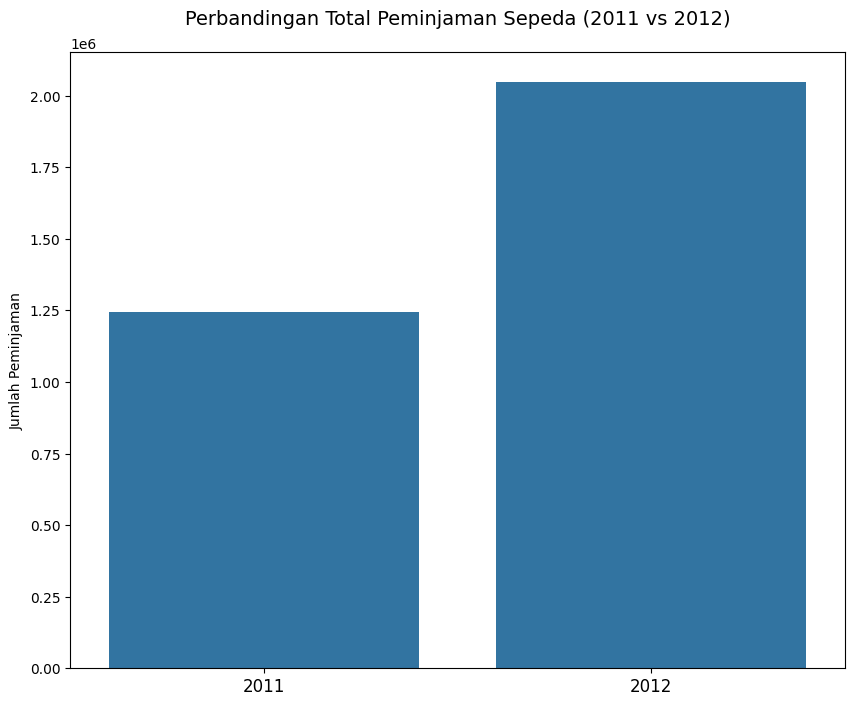

In [152]:
# Membuat Grouping terlebih dahulu
perbandingan_tahun = day_df.groupby(by='Tahun', observed=False)['Total'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(
    x = 'Tahun',
    y = 'Total',
    data = perbandingan_tahun,
)

plt.title('Perbandingan Total Peminjaman Sepeda (2011 vs 2012)', pad=20, fontsize=14)
plt.xlabel(None)
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1], labels=['2011', '2012'], fontsize=12)
plt.show()

#### **Insight**

Saya sudah mengatakan di proses EDA, bahwa eksplorasi menunjukan, `Tahun 2012` adalah Tahun yang paling tinggi jumlah peminjamannya, dan perkataan tersebut bisa di perkuat oleh `Barplot` di atas. Ternyata memang eksplorasi kita tepat untuk mengatakan `Tahun 2012` ini merupakan tahun terbaik. Mengapa:

1. Sukses nya `Ekspansi` besar besaran yang di lakukan oleh `Capital Bike Share` dengan penambahan `32 stasiun` dan memperluas `18 statiun` sisanya pada akhir tahun.
 - Dan lebih gilanya di `Tahun 2012` ini di tambah menjadi `50 stasiun`. Ini membuktikan bahwa strategi yang di ambil oleh `Capital Bike Share` mampu menjadikan `Tahun 2012` menjadi tahun yang paling banyak `Total Peminjamnya`. [Capital Bike Share Sytem](https://https://https://capitalbikeshare.com/system-data)

2. Seperti yang sudah aku katakan pada proses EDA, faktor `Cuaca` pun sangat berjasa dan berpengaruh besar untuk `Tahun 2012` ini. Menurut [The Washington Post](https:/https://https://www.washingtonpost.com/blogs/capital-weather-gang/post/top-5-dc-weather-events-of-2012/2012/12/28/d384311c-4f0e-11e2-950a-7863a013264b_blog.html/) menyatakan bahwa, `Tahun 2012` adalah tahun terhangat yang tercatat di Washington, D.C., dengan Maret yang sangat hangat dan musim panas yang masuk dalam tiga terhangat dalam sejarah.

 - Meskipun ada bencana alam yang terjadi di `Tahun 2012` ini seperti `Huriccane Sandy` tapi tetap bisa di katakan bahwa `Tahun 2012` adalah tahun terbaik dengan `Total Peminjaman Sepeda` Terbanyak, dan itu valid 100%.

 Untuk meningkatkan jumlah peminjaman di tahun mendatang, `Capital Bike Share` perlu melanjutkan ekspansi stasiun di lokasi strategis, mengoptimalkan distribusi sepeda berbasis data, dan menawarkan insentif seperti diskon atau paket keanggotaan fleksibel untuk menarik lebih banyak pengguna. Yang paling penting adalah benefit member dan juga keamanan dan kenyamanan harus di tingkatkan.

 ---

- **Pendukung Kuat untuk menjawab mengapa bisa `Tahun 2012` menjadi tahun yang paling banyak diminati**.

**1. Dominasi `Tahun 2012` di jam sibuk**.

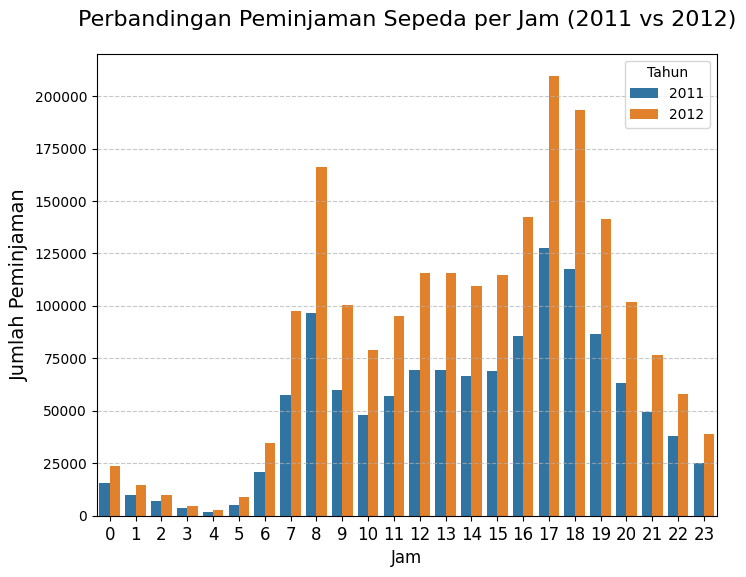

In [153]:
by_hour_df = hour_df.groupby(['Tahun', 'Jam'], observed=False)['Total'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Jam',
    y='Total',
    hue='Tahun',
    data=by_hour_df,
    palette=['#1f77b4', '#ff7f0e']
)

plt.title('Perbandingan Peminjaman Sepeda per Jam (2011 vs 2012)', pad=20, fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title='Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### **Insight**

Walaupun kedua tahun memiliki lonjakan yang signifikan dan pola serupa tapi, `Tahun 2012` selalu berada di paling tinggi.

- `Morning Rush` dan `Evening Rush` sangat mempengaruhi sekali peminjaman sepeda ini di kedua tahun, tapi lonjakan pada `Tahun 2012` di saat `Evening Rush` itu sangat gila banget sampai sampai menyentuh 2.000.000 peminjaman loh.

Tapi dengan visualisasi data ini aku baru menemukan hal menarik:

- Pola pemakaian `pagi` dan `sore` di kedua tahun ini mirip sekali, yang artinya sepeda memang sudah jadi pilihan utama buat mobilitas sehari-hari, bukan cuma buat iseng atau rekreasi doang.
- Lonjakan di `Evening Rush` jauh lebih tajam dibanding `Morning Rush`, bisa jadi karena lebih banyak orang pulang kerja naik sepeda daripada berangkat kerja. Mungkin pulang sekolah juga berpengaruh deh kayanya.


Jadi kesimpulannya di lihat dari manapun `Tahun 2012` ini tahun yang terbaik dari strategi matang yang telah `Capital Bike Share` ciptakan.

Masih banyak sih yang aku perlihatkan tapi mungkin segini saja sudah cukup untuk menjelaskan.

---

#### **2. Bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda?**

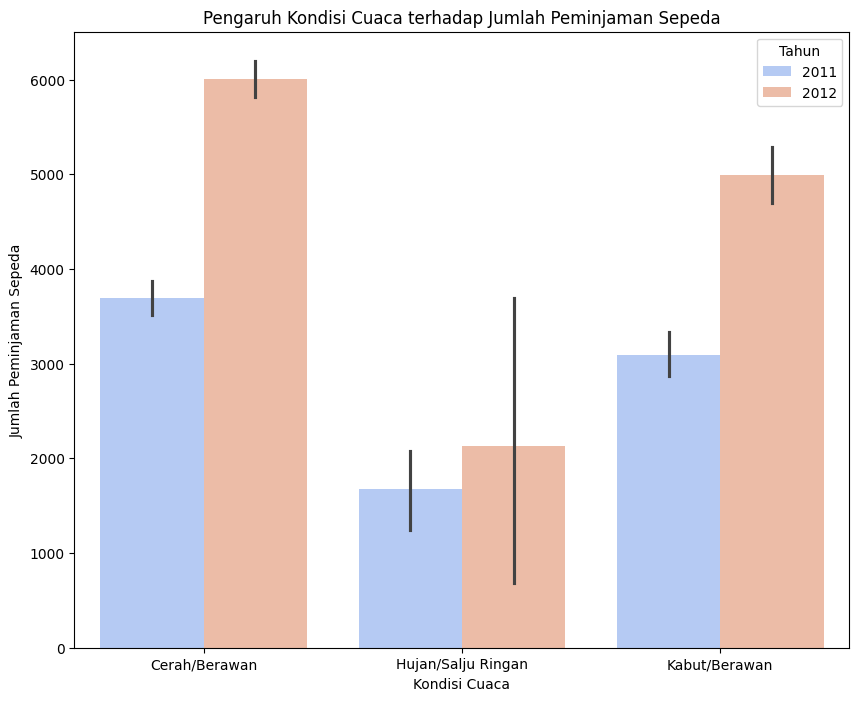

In [154]:
# Grouping
Impact_Cuaca = day_df.groupby(by=['Tahun', 'Cuaca'], observed=False)['Total'].sum().reset_index()


plt.figure(figsize=(10,8))
sns.barplot(x='Cuaca', y='Total',hue='Tahun', data=day_df, palette='coolwarm')

plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")

plt.show()

#### **Insight**

- Dari grafik di atas, terlihat bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Pada kedua Tahun 2011 dan 2012, `Cuaca` `Cerah/Berawan` selalu dikaitkan dengan jumlah `peminjaman tertinggi`, sedangkan `Hujan/Salju Ringan` menunjukkan angka `peminjaman terendah`.

- Tetapi, yang menarik adalah bagaimana `Tahun 2012` mengalami peningkatan drastis di semua kondisi `Cuaca` dibandingkan `Tahun 2011`. Terutama pada kategori `Cerah/Berawan`, jumlah peminjaman melonjak tajam. Ini bukan hanya disebabkan oleh pola `Cuaca` yang mendukung, tetapi juga dipengaruhi oleh faktor eksternal lainnya, seperti ekspansi stasiun yang dilakukan pada tahun tersebut.

- `Saran` Untuk meningkatkan jumlah peminjaman saat kondisi `Hujan/Salju Ringan`, Capital Bike Share dapat menyediakan jas hujan gratis di setiap stasiun dan mungkin kanopi kanopi di setiap jalan untuk menghindari hujan. Dengan begitu, pengguna tetap nyaman bersepeda meskipun `Cuaca` kurang mendukung, sehingga jumlah peminjaman tidak terlalu turun drastis saat `Musim Hujan`.

Untuk memastikan lebih lanjut apakah cuaca di `Tahun 2012` memang lebih mendukung dibanding `Tahun 2011`, kita perlu melihat variabel tambahan seperti suhu rata rata dan tingkat curah hujan per bulan.

---

- **Melihat peran `Suhu Terasa` kepada `Total Peminjaman` untuk membuktikan `Cuaca` `Cerah/Berawan` itu valid**.

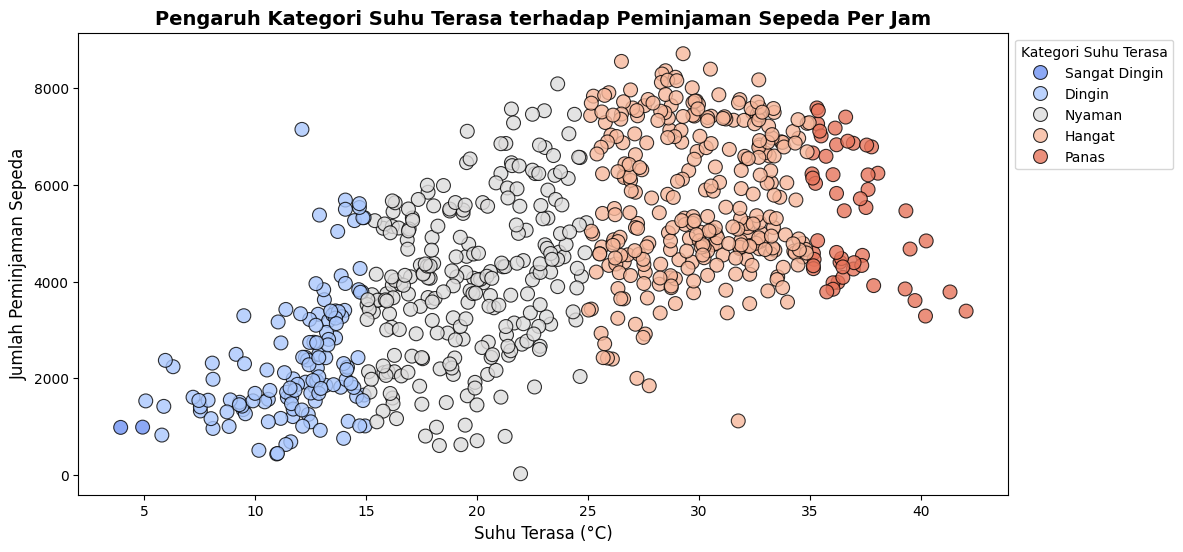

  Kategori_Suhu_Terasa    Total
0               Hangat  1594727
1               Nyaman  1014586
2                Panas   420732
3               Dingin   273014
4        Sangat Dingin     2944


In [155]:
atemp_impact = hour_df.groupby(by='Kategori_Suhu_Terasa', observed=False)['Total'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))

scatter = sns.scatterplot(
    x='Suhu_Terasa',
    y='Total',
    hue='Kategori_Suhu_Terasa',
    palette='coolwarm',
    data=day_df,
    alpha=0.8,
    edgecolor='black',
    s=100
)

plt.title('Pengaruh Kategori Suhu Terasa terhadap Peminjaman Sepeda Per Jam', fontsize=14, fontweight='bold')
plt.xlabel('Suhu Terasa (°C)', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)
plt.legend(title='Kategori Suhu Terasa', bbox_to_anchor=(1,1))
plt.show()
print(atemp_impact)

#### **Insight**

Aku menggunakan `hour_df` untuk mendukung apa yang telah di katakan, bahwa `Cuaca` `Cerah/Berawan` memeiliki kontribusi tertinggi untuk `Total Peminjaman` dan mengapa aku menggunakan `Suhu_Terasa` karena, `Suhu_Terasa` merepresentasikan `Suhu Asli` dan `Kelembapan`.

Dan setelah itu aku menemukan sebuah kesimpulan:

- `Hangat` dan `Nyaman` merupakan keniakan yang sangat stabil dan signifikan bisa di lihat dari `scatterplot` di atas lonjakan `Jumlah Peminjaman` di saat `Suhu_Terasa` mencapai 15 Celcius sampai  35 Celcius.

Dan pada kesimpulannya bahwa `Cuaca` `Cerah/Berawan` dapat di katakan merupakan sebuah fakta dan bukti nyata bahwa dialah yang paling berkontribusi untuk `Total Peminjaman` `Capital Bike Share`.

---

#### **3. Bagaimana pola penggunaan sepeda berbeda antara pelanggan kasual dan pelanggan terdaftar pada hari kerja vs. akhir pekan serta pada berbagai jam dalam sehari?**

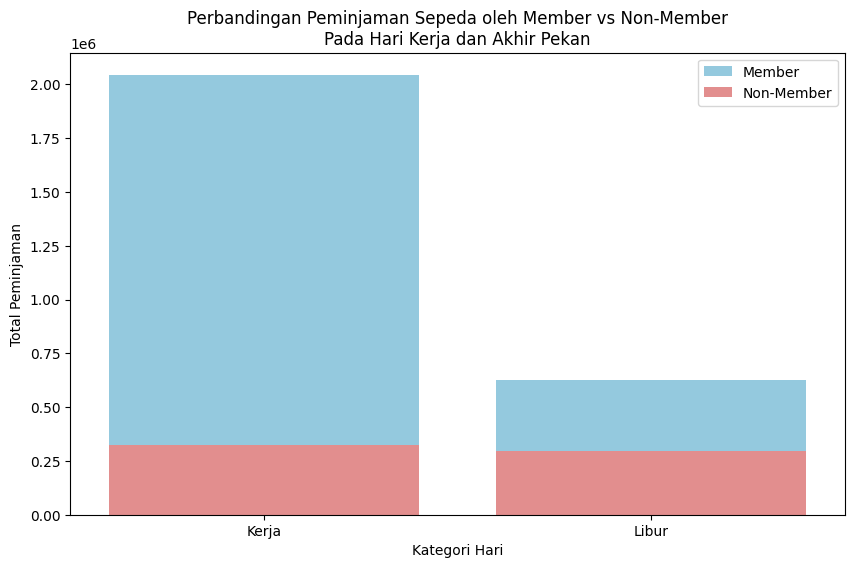

In [156]:
# Kelompokkan data langsung tanpa buat kolom baru
kategori_totals = day_df.groupby(
    day_df['Hari'].apply(lambda x: 'Libur' if x in ['Sabtu', 'Minggu'] else 'Kerja')
)[['Member', 'Non_member']].sum().reset_index()

# Buat plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=kategori_totals,
    x='Hari',
    y='Member',
    label='Member',
    color='skyblue'
)
sns.barplot(
    data=kategori_totals,
    x='Hari',
    y='Non_member',
    label='Non-Member',
    color='lightcoral'
)

# Tambahkan judul dan label
plt.title('Perbandingan Peminjaman Sepeda oleh Member vs Non-Member\nPada Hari Kerja dan Akhir Pekan')
plt.xlabel('Kategori Hari')
plt.ylabel('Total Peminjaman')
plt.legend()

# Tampilkan plot
plt.show()

#### **Insight**

Perbedaan yang bisa kita simpulkan dan kita ambil antara `Non_member` dan `Member` adalah:

- `Member`: Pengguna berlangganan lebih dominan menggunakan sepeda pada `hari kerja`, yang menunjukkan bahwa mereka memanfaatkannya sebagai sarana transportasi utama untuk aktivitas rutin seperti perjalanan ke **tempat kerja atau sekolah**.
 - Jumlah peminjaman mereka turun cukup signifikan pada `akhir pekan`, menandakan bahwa mereka lebih jarang menggunakan sepeda untuk liburan, karena mungkin lebih memilih istirahat dan meluangkan waktu bersama keluarganya. Dia liburannya pake mobil ye.

- `Non Member`: Berbeda dengan Pengguna kasual yang memiliki pola peminjaman lebih merata antara `hari kerja` dan `akhir pekan`, meskipun total peminjamannya tetap lebih kecil dibandingkan member.
 - Hal ini mengindikasikan bahwa `Non member` kemungkinan besar adalah wisatawan atau pengguna rekreasi, yang menggunakan sepeda secara fleksibel tanpa bergantung pada jadwal kerja.


Kesimpulannya, `member` lebih mengandalkan sepeda sebagai alat transportasi fungsional, sedangkan `Non member` lebih cenderung menggunakannya untuk keperluan rekreasi.

Dengan `insight` ini, kita bisa menyusun strategi yang lebih tepat untuk meningkatkan jumlah pengguna. Misalnya, menawarkan paket langganan fleksibel untuk Non member agar mereka tertarik menjadi member, atau meningkatkan promosi dan fasilitas bagi wisatawan pada akhir pekan.

Tapi untuk membuktikan data ini benar aku akan menghadirkan support nya.

---

- **Perbandingan Pola Peminjaman Sepeda Berdasarkan Jam dalam Kerja vs Akhir Pekan.**

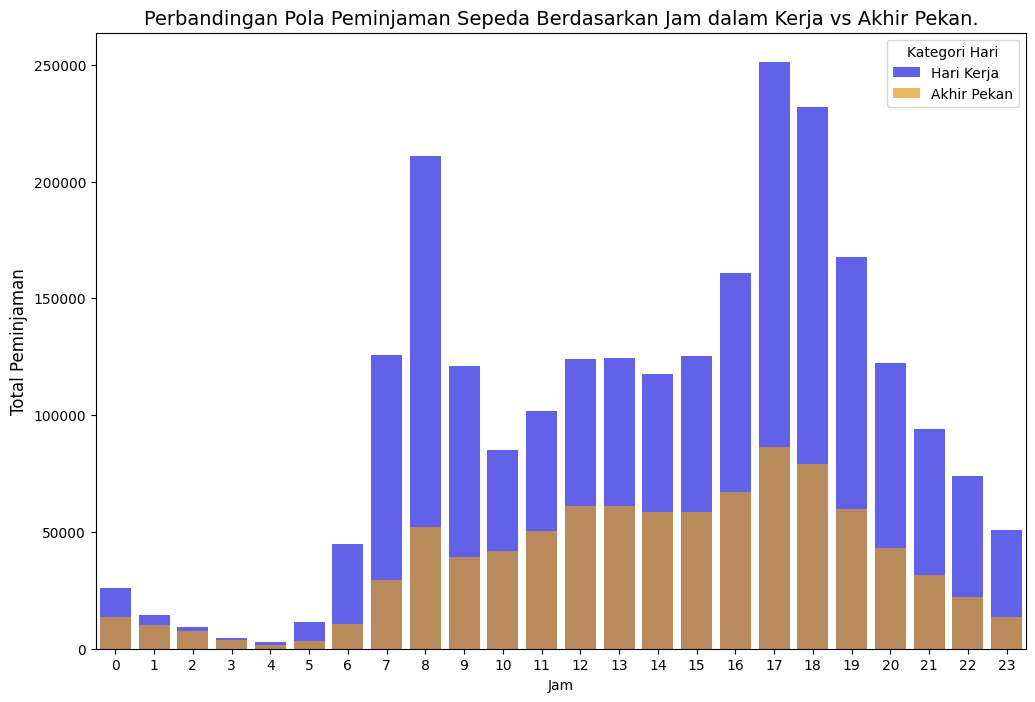

In [157]:
# Filtering data berdasarkan hari
df_kerja = hour_df[hour_df['Hari'].isin(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'])]
df_libur = hour_df[hour_df['Hari'].isin(['Sabtu', 'Minggu'])]

# Grouping berdasarkan jam dan total
jam_kerja = df_kerja.groupby('Jam', observed=False)['Total'].sum().reset_index()
jam_libur = df_libur.groupby('Jam', observed=False)['Total'].sum().reset_index()

# Membuat plot
plt.figure(figsize=(12, 8))
sns.barplot(x=jam_kerja['Jam'], y=jam_kerja['Total'], color='blue', label='Hari Kerja', alpha=0.7)
sns.barplot(x=jam_libur['Jam'], y=jam_libur['Total'], color='orange', label='Akhir Pekan', alpha=0.7)

# Menambahkan judul dan label
plt.title('Perbandingan Pola Peminjaman Sepeda Berdasarkan Jam dalam Kerja vs Akhir Pekan.', fontsize=14)
plt.xlabel('Jam', fontsize=10)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Kategori Hari')

# Menampilkan plot
plt.show()

#### **Insight**

Dari insight yang sudah kita dapatkan sebelumnya di tambah dengan barplot yang lebih spesifik dengan melihat perbedaan perjamnya aku menemmukan bahwa:

- `Hari Kerja` sangat mendominasi sekali dan tadi insight sebelumnya mengatakan bahwa `Hari Kerja` di dominasi oleh `Member`. dan terbukti karena:
 - Aktivitas di `Pagi Hari` (Jam 6 - 8) dan `Sore menjelang Malam` (Jam 16 - 19) terlihat bahwa lonjakan besar yang sangat signifikan terjadi, ini menunjukan bukti bahwa `Member` lebih memanfaatkan sepedanya dengan menjadikan sepeda nya alat `transportasi umum` atau `commuter`.

- Sedangkan untuk `Akhir Pekan` grafik menunjukan ke stabilan dan tidak ada lonjakan yang terlalu signifikan, ini membuktikan bahwa `Non Member` menggunakan sepedanya tanpa ada variable lain yang mendukung nya, mungkin ada, yaitu saat liburan dan hanya iseng saja.

- `Saran` perusahaan harus lebih memfokuskan diri kepada `Member` tanpa mengurangi kepedulian terhadap `Non-member`. Misalkan, mungkin saja di `Non-member` bukan hanya sekedar orang orang yang berlibur tapi ada juga pekerja yang belum mau berlangganan menjadi `Member`. Nah perusahaan harus memfokuskan diri kepada hal itu juga.

#### **4. Bagaimana tren peminjaman sepeda berubah sepanjang musim dalam satu tahun?**

- Kolom **`Musim`**

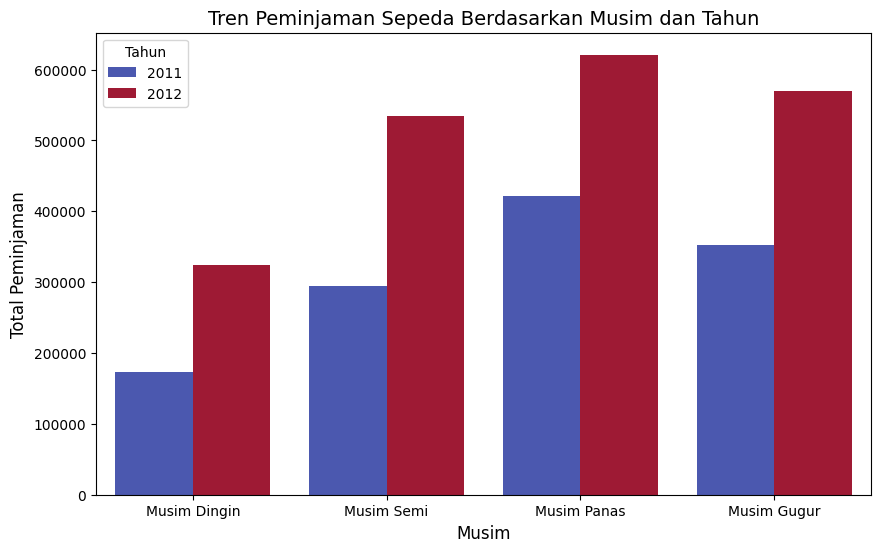

In [185]:
urutan_musim = ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur']

# Filter data untuk tahun 2011 dan 2012
filtered_2011 = day_df[day_df['Tahun'] == 2011]
filtered_2012 = day_df[day_df['Tahun'] == 2012]

# Hitung total peminjaman per musim untuk setiap tahun
total_peminjaman_2011 = filtered_2011.groupby('Musim', observed=False)['Total'].sum().reset_index()
total_peminjaman_2012 = filtered_2012.groupby('Musim', observed=False)['Total'].sum().reset_index()

# Gabungkan data untuk visualisasi
total_peminjaman = pd.concat([total_peminjaman_2011, total_peminjaman_2012])
total_peminjaman['Tahun'] = [2011] * len(total_peminjaman_2011) + [2012] * len(total_peminjaman_2012)

# Visualisasi dengan urutan musim yang benar
plt.figure(figsize=(10, 6))
sns.barplot(x='Musim', y='Total', hue='Tahun', data=total_peminjaman, palette='coolwarm', order=urutan_musim)
plt.title('Tren Peminjaman Sepeda Berdasarkan Musim dan Tahun', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.show()

#### **Insight**

Dari apa yang aku dapatkan terlihat bahwa perbedaan dalam sepanjang tahun masih sama saja:

1.	Peningkatan di Semua Musim
- Terlihat bahwa jumlah peminjaman sepeda pada tahun 2012 lebih tinggi dibandingkan tahun 2011 di semua musim.
- Ini mengindikasikan adanya pertumbuhan penggunaan sepeda secara keseluruhan, kemungkinan akibat ekspansi layanan, peningkatan kesadaran pengguna, atau faktor lainnya.
2.	Musim Panas Menjadi Puncak Tertinggi
- Baik pada tahun 2011 maupun 2012, musim panas mencatat jumlah peminjaman tertinggi.
- Hal ini masuk akal karena cuaca lebih nyaman dan mendukung aktivitas luar ruangan, sehingga semakin banyak orang tertarik menggunakan sepeda.
3.	Musim Dingin Memiliki Jumlah Peminjaman Terendah
- Peminjaman sepeda menurun drastis selama musim dingin, terutama pada tahun 2011.
- Faktor seperti suhu rendah, hujan, atau salju kemungkinan menjadi penyebab utama penurunan peminjaman.
4.	Peningkatan Signifikan di Musim Semi dan Gugur
- Dari 2011 ke 2012, peningkatan peminjaman cukup signifikan pada musim semi dan gugur.
- Ini menunjukkan bahwa pengguna semakin nyaman menggunakan sepeda di luar musim panas, mungkin karena infrastruktur yang lebih baik atau strategi pemasaran yang efektif.


## **Kesimpulan**

---
#### Pertanyaan Ke 1 : Bagaimana perbedaan total peminjaman sepeda antara tahun 2011 dan 2012?


- Tren peminjaman sepeda sepanjang tahun menunjukkan bahwa 2012 adalah tahun terbaik dengan jumlah peminjaman tertinggi. Hal ini selaras dengan ekspansi besar-besaran yang dilakukan Capital Bike Share, termasuk penambahan dan perluasan stasiun yang signifikan. Selain itu, cuaca yang lebih hangat dibanding tahun sebelumnya juga berkontribusi terhadap peningkatan jumlah peminjaman.

- Pola peminjaman menunjukkan lonjakan tajam pada jam sibuk pagi dan sore, terutama saat Evening Rush, yang mencapai lebih dari 2 juta peminjaman. Ini menegaskan bahwa sepeda telah menjadi moda transportasi utama bagi banyak orang, bukan hanya untuk rekreasi.

- Untuk meningkatkan jumlah peminjaman di tahun mendatang, Capital Bike Share dapat melanjutkan ekspansi stasiun, mengoptimalkan distribusi sepeda berbasis data, serta menawarkan insentif keanggotaan yang lebih fleksibel. Selain itu, faktor keamanan dan kenyamanan pengguna juga harus terus ditingkatkan agar tren positif ini berlanjut.

---

#### Pertanyaan Ke 2: Bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda?

- Cuaca memainkan peran penting dalam jumlah peminjaman sepeda di Capital Bike Share. Kondisi cerah atau berawan secara konsisten dikaitkan dengan jumlah peminjaman tertinggi, sementara hujan atau salju ringan menyebabkan penurunan signifikan dalam penggunaan sepeda. Pada Tahun 2012, terjadi peningkatan peminjaman di semua kondisi cuaca dibandingkan dengan 2011, yang didukung oleh ekspansi stasiun serta kondisi cuaca yang lebih hangat.

- Analisis lebih lanjut menunjukkan bahwa suhu juga menjadi faktor utama. Peminjaman sepeda meningkat stabil saat suhu terasa berada di kisaran 15°C hingga 35°C, menunjukkan bahwa cuaca yang hangat dan nyaman mendorong lebih banyak orang untuk bersepeda.

- Untuk mempertahankan pertumbuhan peminjaman, Capital Bike Share dapat meningkatkan fasilitas di stasiun, seperti menyediakan jas hujan gratis atau kanopi di jalur sepeda, agar pengguna tetap merasa nyaman meskipun dalam kondisi hujan ringan. Selain itu, ekspansi stasiun di lokasi strategis dan optimalisasi ketersediaan sepeda berdasarkan pola cuaca dapat semakin meningkatkan jumlah peminjaman di masa mendatang.

---

#### Pertanyaan Ke 3 : Bagaimana pola penggunaan sepeda berbeda antara pelanggan kasual dan pelanggan terdaftar pada hari kerja vs. akhir pekan serta pada berbagai jam dalam sehari?

- Terdapat perbedaan pola peminjaman yang jelas antara pengguna Member dan Non-member. Pengguna Member didominasi oleh pekerja atau pelajar yang menggunakan sepeda sebagai sarana transportasi utama pada hari kerja. Hal ini terlihat dari pola lonjakan peminjaman yang signifikan di pagi hari (06:00 - 08:00) dan sore hari (16:00 - 19:00), yang mencerminkan kebiasaan bepergian dari dan ke tempat kerja atau sekolah. Pada akhir pekan, jumlah peminjaman oleh Member menurun, menunjukkan bahwa mereka cenderung beristirahat atau menggunakan moda transportasi lain untuk keperluan rekreasi.

- Sebaliknya, pengguna Non-member memiliki pola peminjaman yang lebih merata antara hari kerja dan akhir pekan, meskipun total peminjamannya lebih kecil dibandingkan Member. Hal ini mengindikasikan bahwa mereka lebih banyak menggunakan sepeda untuk keperluan rekreasi atau wisata, tanpa keterikatan dengan jadwal kerja. Tidak ada lonjakan signifikan pada jam tertentu di akhir pekan, yang memperkuat asumsi bahwa pengguna Non-member meminjam sepeda secara fleksibel, kemungkinan besar untuk keperluan santai.

- Dengan pemahaman ini, Capital Bike Share dapat menyusun strategi yang lebih efektif untuk meningkatkan jumlah pengguna. Untuk Member, perusahaan dapat meningkatkan layanan yang mendukung perjalanan harian mereka, seperti optimalisasi jumlah sepeda yang tersedia di jam sibuk atau menawarkan insentif khusus bagi pelanggan setia. Sementara itu, untuk Non-member, perusahaan dapat mengembangkan program promosi yang lebih menarik, seperti paket langganan fleksibel untuk wisatawan atau pekerja yang belum siap berlangganan penuh. Dengan demikian, perusahaan dapat meningkatkan loyalitas pelanggan dan menarik lebih banyak pengguna dari kedua segmen ini.

---

#### Pertanyaan Ke 4 : Bagaimana tren peminjaman sepeda berubah sepanjang musim dalam satu tahun?

Dari visualisasi ini, kita bisa melihat bahwa jumlah peminjaman sepeda meningkat di semua musim pada tahun 2012 dibandingkan 2011, dengan musim panas sebagai puncak tertinggi peminjaman.

- Musim Dingin memiliki jumlah peminjaman terendah, kemungkinan karena faktor cuaca yang kurang mendukung untuk bersepeda.
- Musim Panas menunjukkan lonjakan peminjaman yang signifikan, menandakan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda.
- Musim Semi dan Musim Gugur juga mengalami peningkatan dibandingkan tahun sebelumnya, meskipun tidak setinggi musim panas.

Saran: Perusahaan bisa fokus pada strategi musim dingin, seperti memberikan diskon atau meningkatkan kenyamanan sepeda, serta memanfaatkan puncak musim panas dengan menambah stasiun sepeda di area wisata dan tempat ramai.